In [2]:
library(readxl)
library(ggplot2)
library("FactoMineR")
library(tidyverse) #data Manipulation
library(cluster) #Clustering algorithms
library(factoextra)#Clustering Algorithms & Visualization
library(gridExtra)
#install.packages("dendextend")
#install.packages("ggplot2")
#install.packages("rlang")
library(dendextend) # For fancy deprograms
library(rlang) # clustering cutting
library("np") #npreg: you may need to install it
library(PerformanceAnalytics)
library(psych)
#install.packages('fmsb')
library(fmsb) #For Spider Plots
#install.packages('countrycode')
library(countrycode)
#install.packages(c('hrbrthemes','viridis'))
#library(hrbrthemes)
#library(viridis)
#install.packages('GGally')
library(GGally)
library(dplyr)
library(ggmap)
library(leaflet)
library(htmltools)

library(dplyr) #getMap()
library(rgeos)
#install.packages('rworldmap')
library(rworldmap) #joinCountryData2Map
library(grid)
library(tidyr)
#install.packages(c("cowplot", "googleway", "ggplot2", "ggrepel", "ggspatial", "sf", "rnaturalearth", "rnaturalearthdata"))
library("sf")
library("rnaturalearth")
library("rnaturalearthdata")

Warning message:
"package 'ggplot2' was built under R version 4.0.3"
Warning message:
"package 'FactoMineR' was built under R version 4.0.3"
Warning message:
"package 'tidyverse' was built under R version 4.0.3"
-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v tibble  3.0.3     v dplyr   1.0.2
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.0
v purrr   0.3.4     

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Warning message:
"package 'factoextra' was built under R version 4.0.3"
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine


Warning message:
"package 'dendextend' was built under R version 4.0.3"

---------------------
Welcome to dendextend version 1.14.0
Type citation('dendexte

In [3]:
df.water.access <- read_excel("C:/Users/hichul/Desktop/2020-2021/Fall of 2020/Independent Study/water-accessibility/results/df-water-access.xlsx",sheet=1)
dfsimple <- read_excel("C:/Users/hichul/Desktop/2020-2021/Fall of 2020/Independent Study/water-accessibility/results/dfsimple.xlsx",sheet=1)
head(df.water.access)
df.wa <- df.water.access[,c('ptap','bore','pspr', 'uspr', 'pwel', 'uwel','surw','tles','tmor','rain','phom' )]

Country,ptap,bore,pspr,uspr,pwel,uwel,surw,tles,tmor,rain,phom
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,14.2,20.1,4.7,8.6,18.5,11.1,7.3,45.2,8.2,0.4,2.3
Albania,2.4,1.4,2.5,0.8,4.1,0.8,0.0,20.6,1.1,0.0,48.8
Angola,10.3,1.9,3.3,4.8,9.1,8.3,18.0,46.1,15.6,1.7,4.3
Armenia,0.5,0.2,1.0,0.1,0.2,0.0,0.0,1.6,0.1,0.0,88.3
Azerbaijan,3.5,9.3,7.5,1.1,6.2,0.2,7.0,18.7,4.4,0.0,34.0
Bangladesh,2.7,86.4,0.0,0.3,0.2,0.6,1.2,22.7,1.6,0.4,4.3


      ptap             bore             pspr             uspr       
 Min.   : 0.000   Min.   : 0.000   Min.   : 0.000   Min.   : 0.000  
 1st Qu.: 2.775   1st Qu.: 0.225   1st Qu.: 0.000   1st Qu.: 0.000  
 Median :10.300   Median : 3.900   Median : 0.550   Median : 1.050  
 Mean   :11.755   Mean   :12.571   Mean   : 3.128   Mean   : 3.640  
 3rd Qu.:17.675   3rd Qu.:19.925   3rd Qu.: 3.675   3rd Qu.: 2.775  
 Max.   :57.700   Max.   :86.400   Max.   :47.900   Max.   :36.300  
      pwel             uwel             surw             tles      
 Min.   : 0.000   Min.   : 0.000   Min.   : 0.000   Min.   : 0.00  
 1st Qu.: 0.525   1st Qu.: 0.425   1st Qu.: 1.200   1st Qu.:12.72  
 Median : 3.950   Median : 3.750   Median : 4.100   Median :30.65  
 Mean   : 6.314   Mean   : 6.821   Mean   : 5.124   Mean   :32.56  
 3rd Qu.: 8.825   3rd Qu.:10.425   3rd Qu.: 7.525   3rd Qu.:49.88  
 Max.   :48.100   Max.   :33.000   Max.   :19.200   Max.   :75.10  
      tmor             rain             p

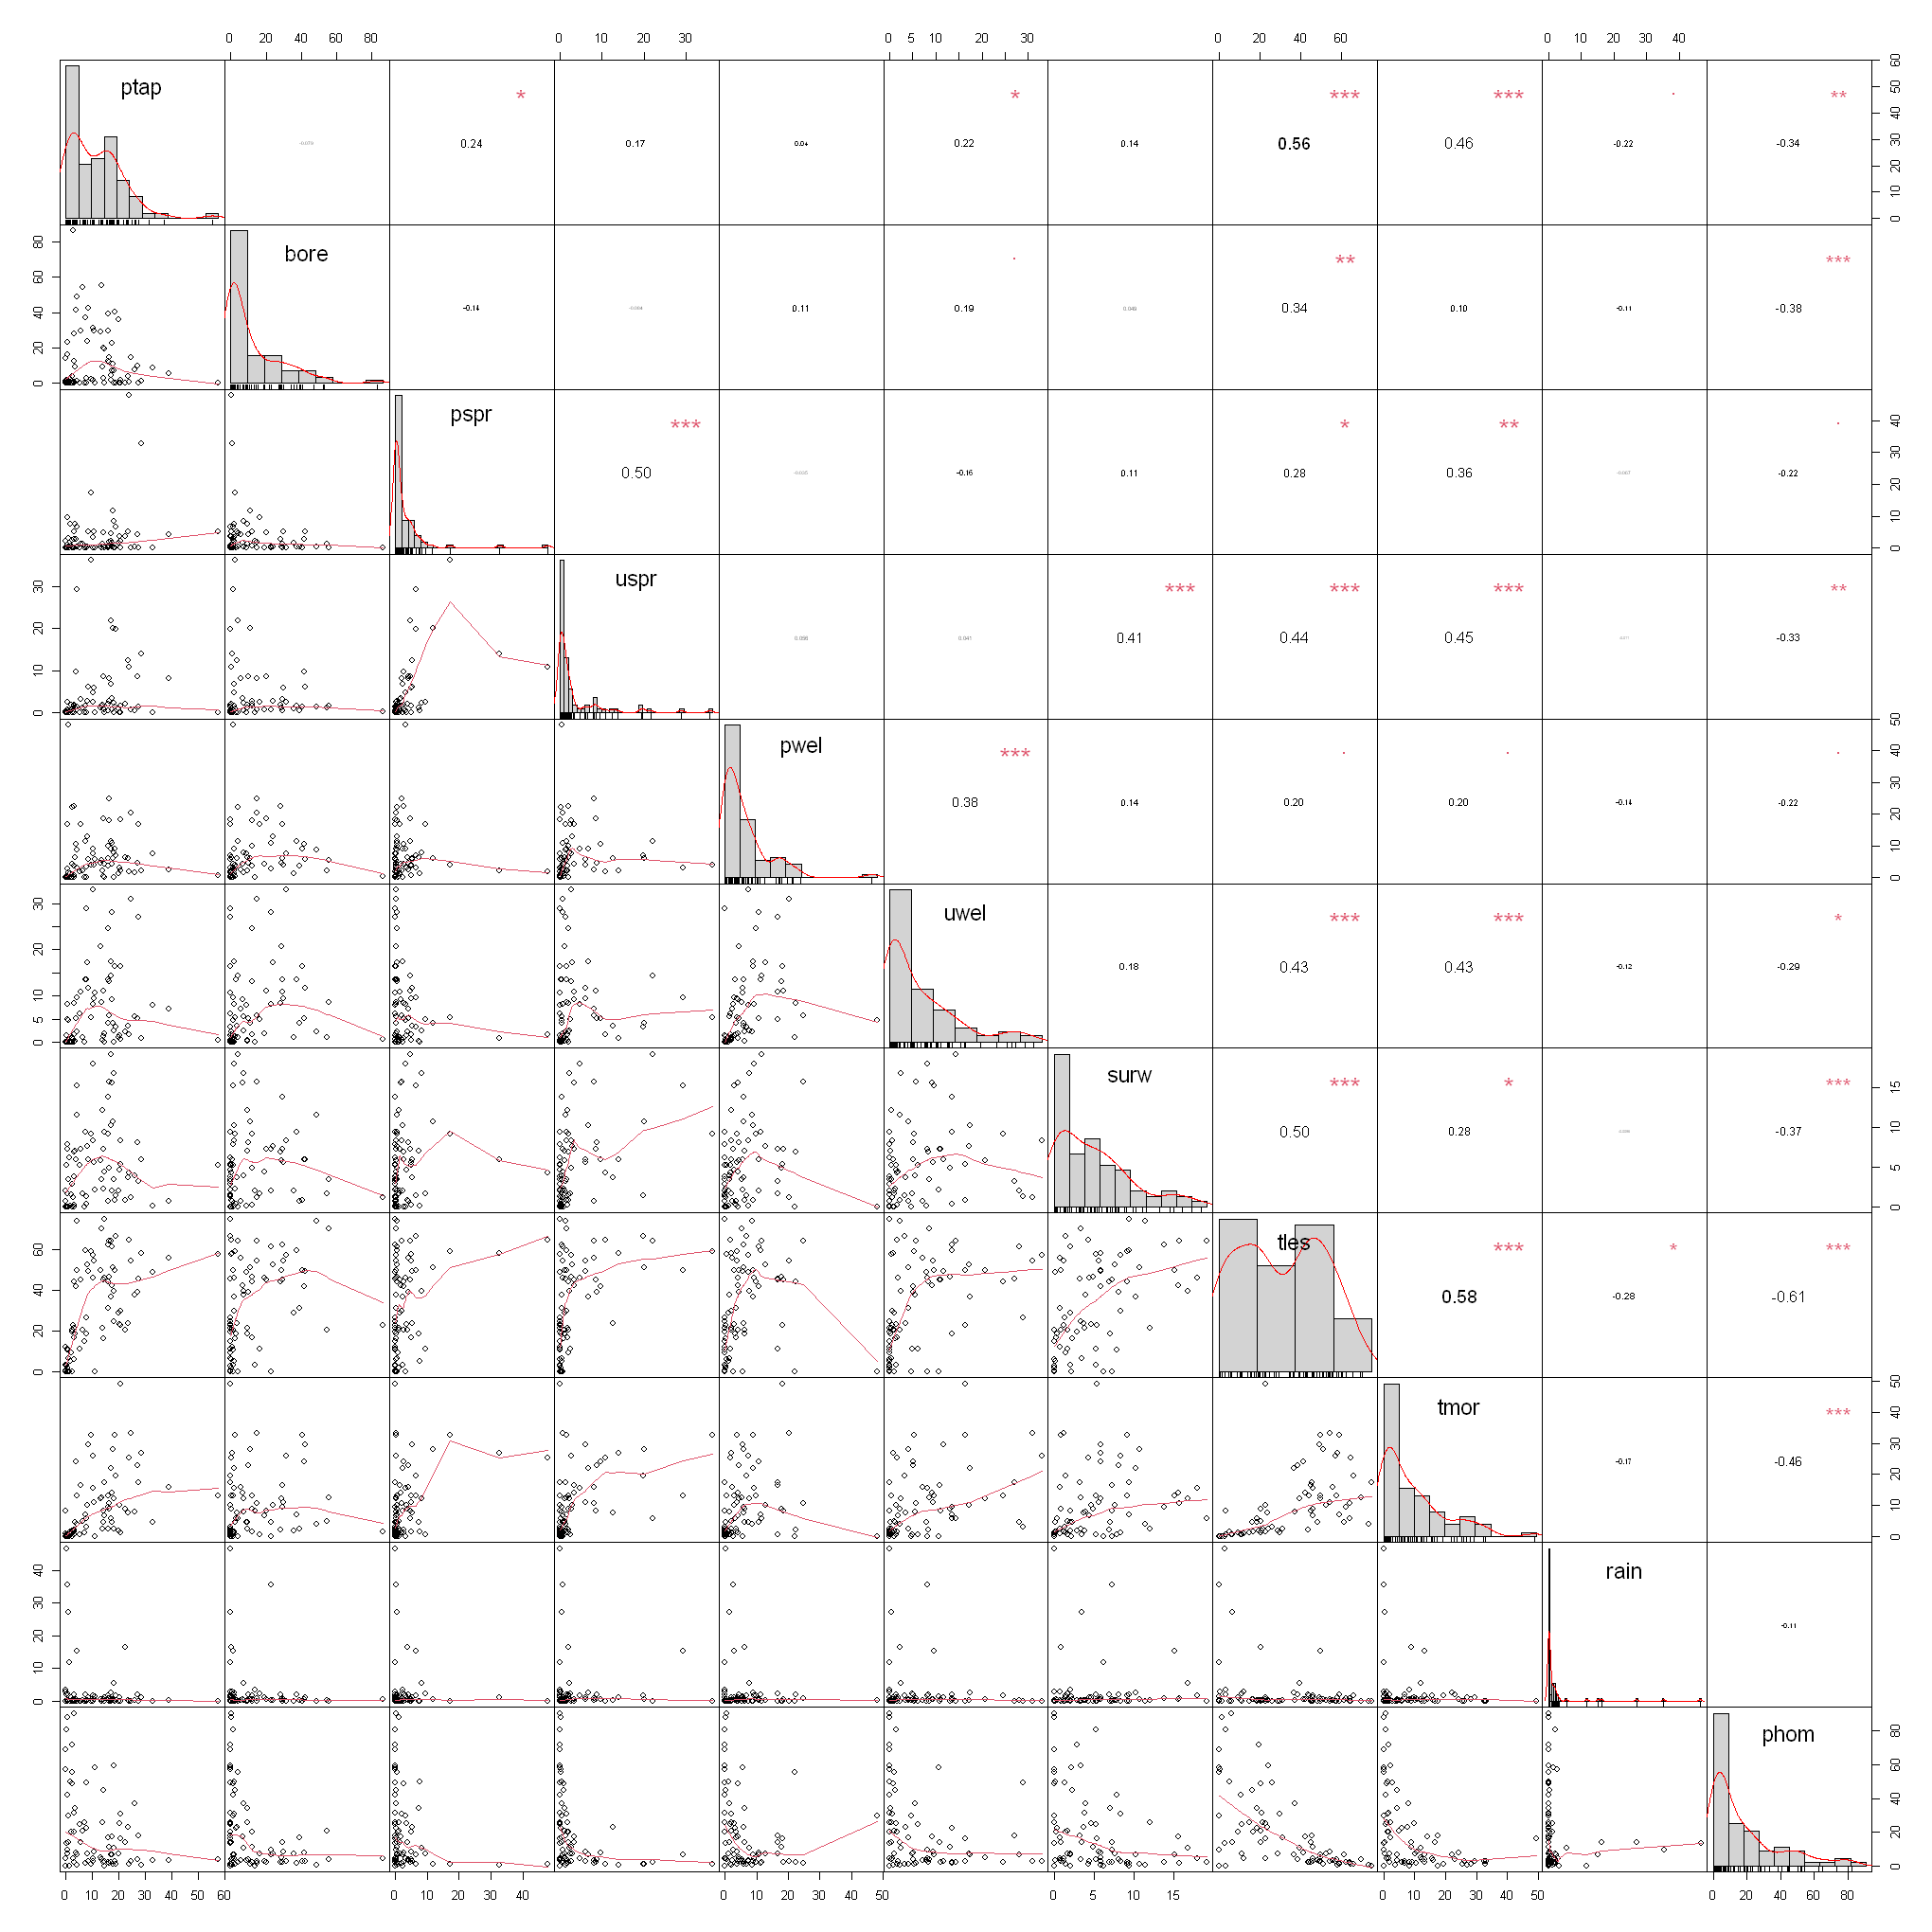

In [111]:
summary(df.wa)
chart.Correlation(df.wa, histogram=TRUE, pch=19 , tl.cex = .7 )

# Spider Plots of the variables

In [112]:
# Create data: Water Accessibility Aggregate
df.wa.aggregate <- aggregate(df.wa, list(clusters=dfsimple$clusters), mean)
df.wa.aggregate <- df.wa.aggregate[,2:12]
df.wa.aggregate

ptap,bore,pspr,uspr,pwel,uwel,surw,tles,tmor,rain,phom
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
11.586364,35.109091,1.290909,2.5590909,9.254545,11.950000,5.350000,48.554545,12.195455,0.4590909,6.086364
4.564286,1.028571,0.850000,0.1785714,2.421429,3.157143,1.807143,9.635714,1.142857,0.5214286,61.928571
21.725000,4.535000,7.935000,9.8850000,7.490000,8.555000,9.185000,51.660000,19.000000,1.6750000,5.180000
7.436364,4.681818,2.045455,1.2454545,4.781818,2.445455,3.318182,13.790909,2.940909,6.7954545,18.672727


# Extract table of cluster centroids.

[1] 64.61971 63.01837 62.65992 26.76747

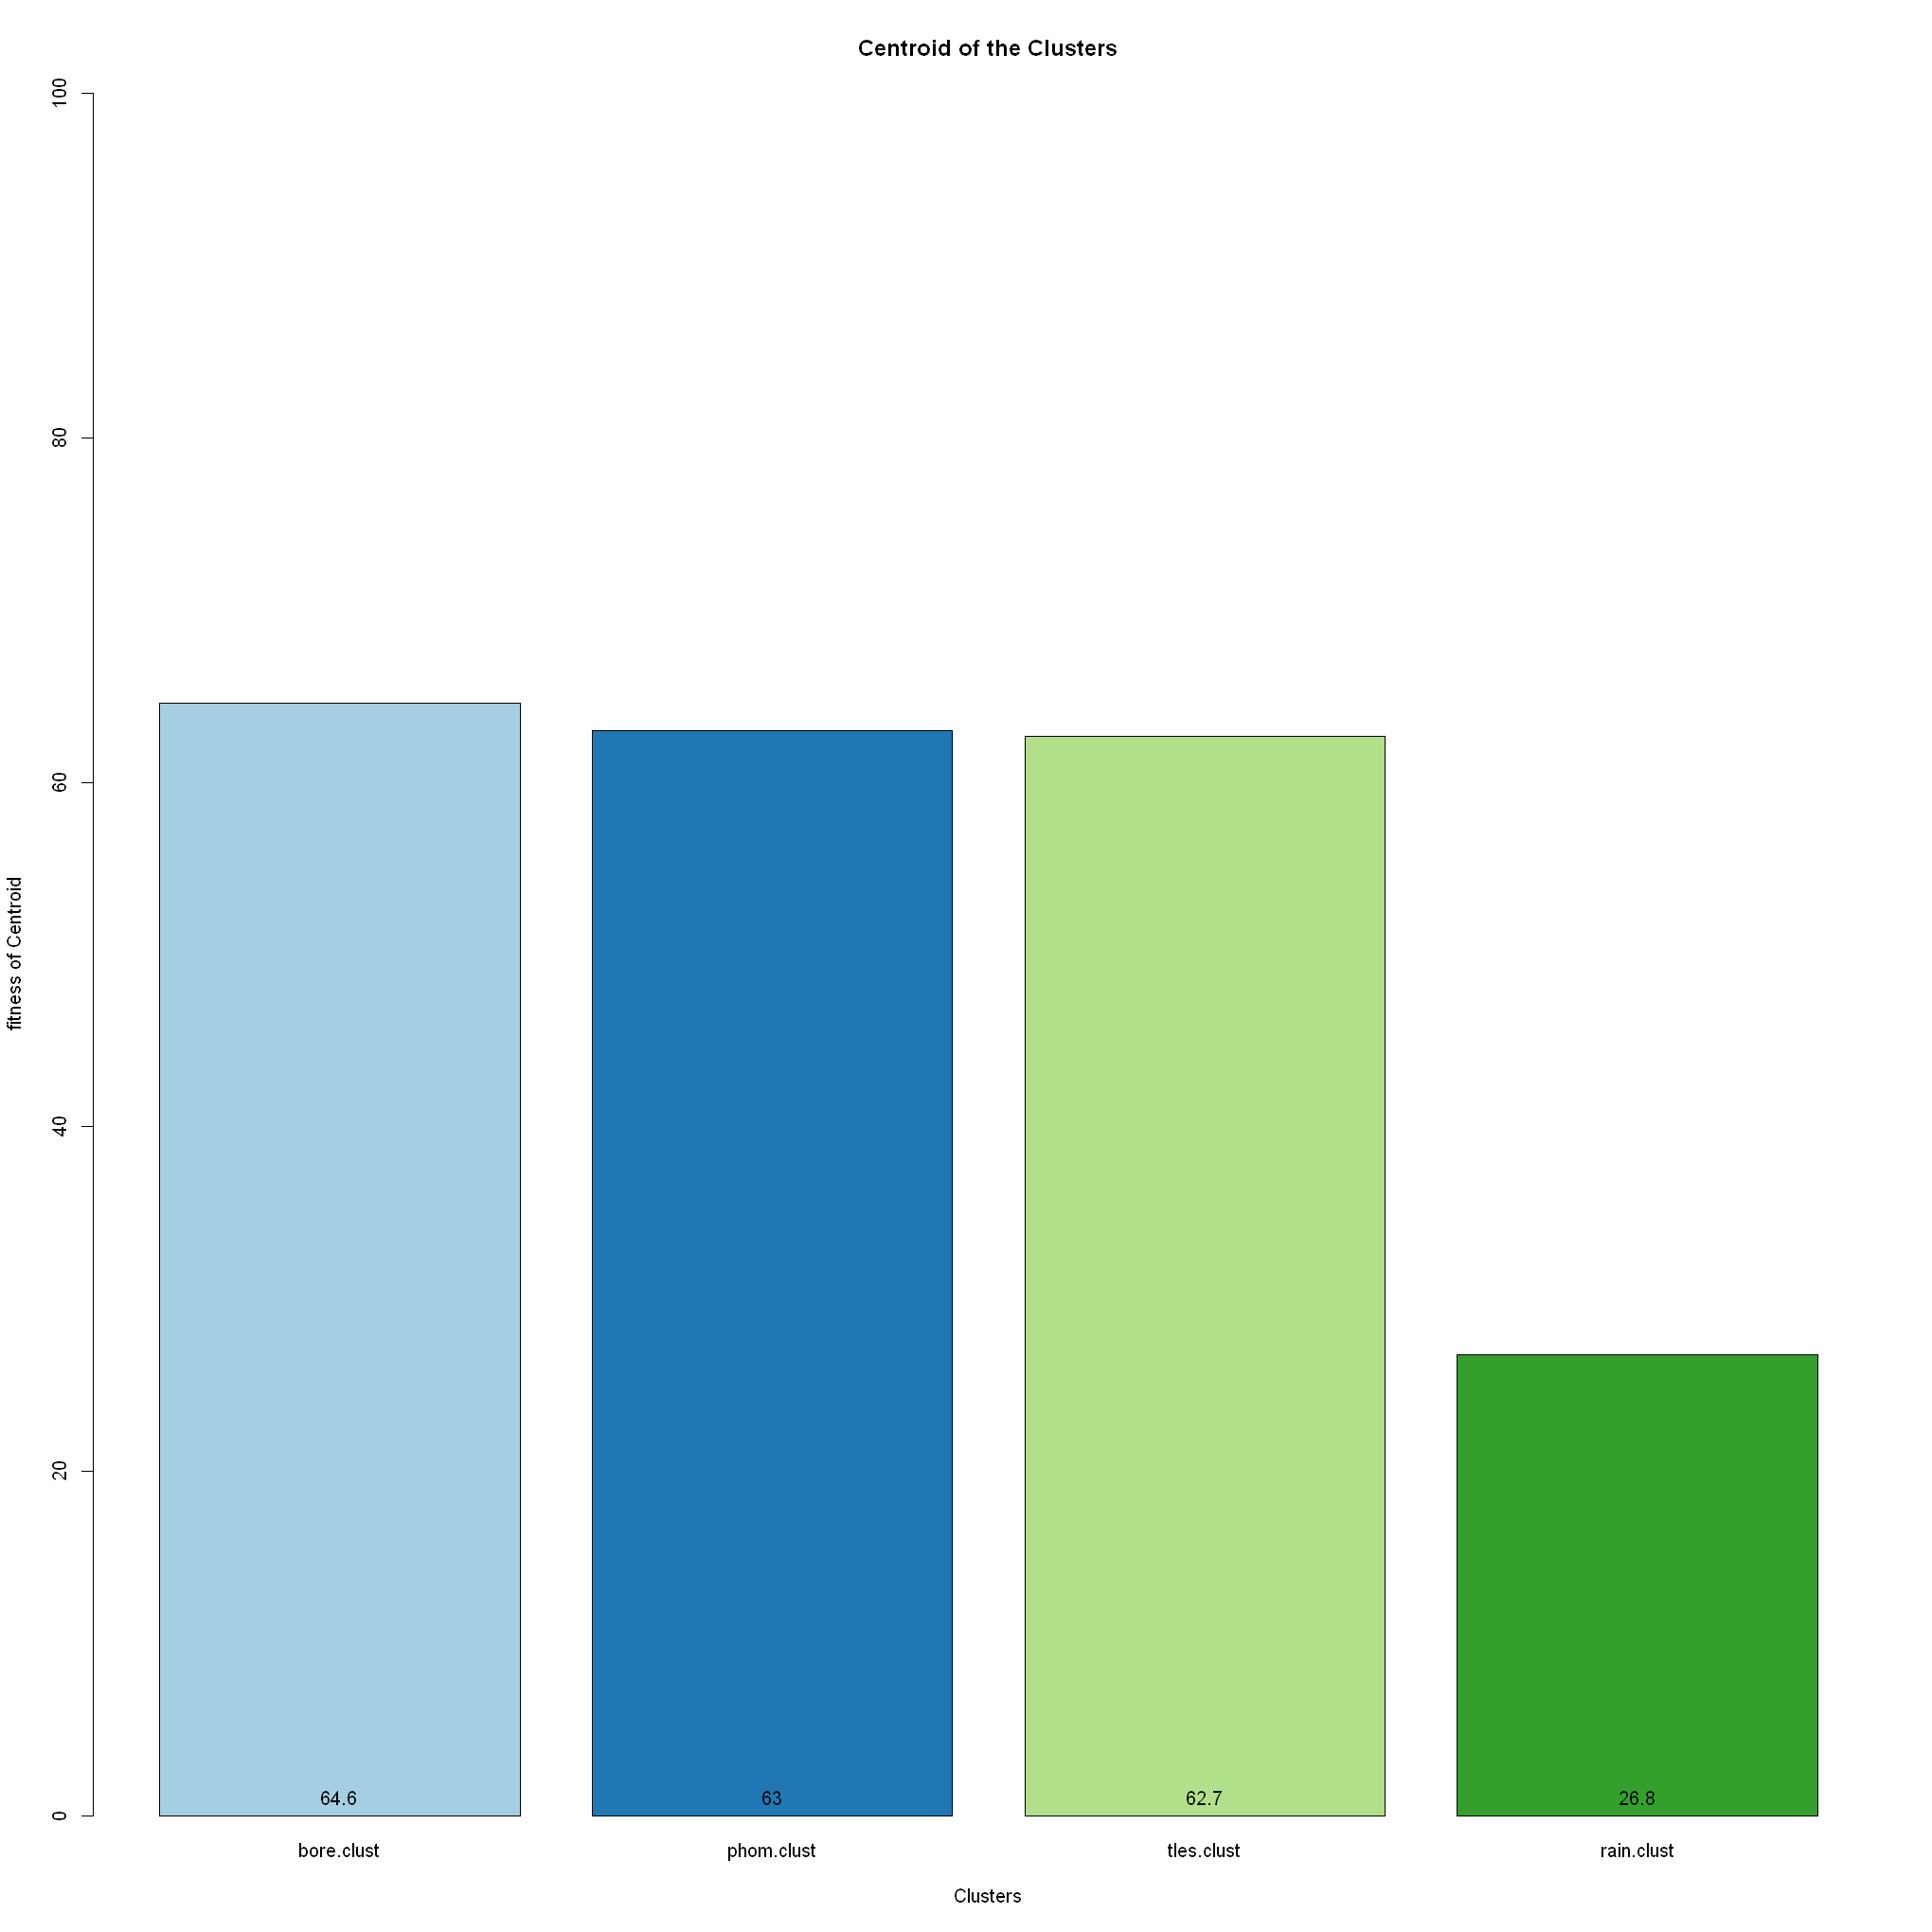

[1] 57.75967 53.28292 54.85690 88.32214 42.05627 89.50240

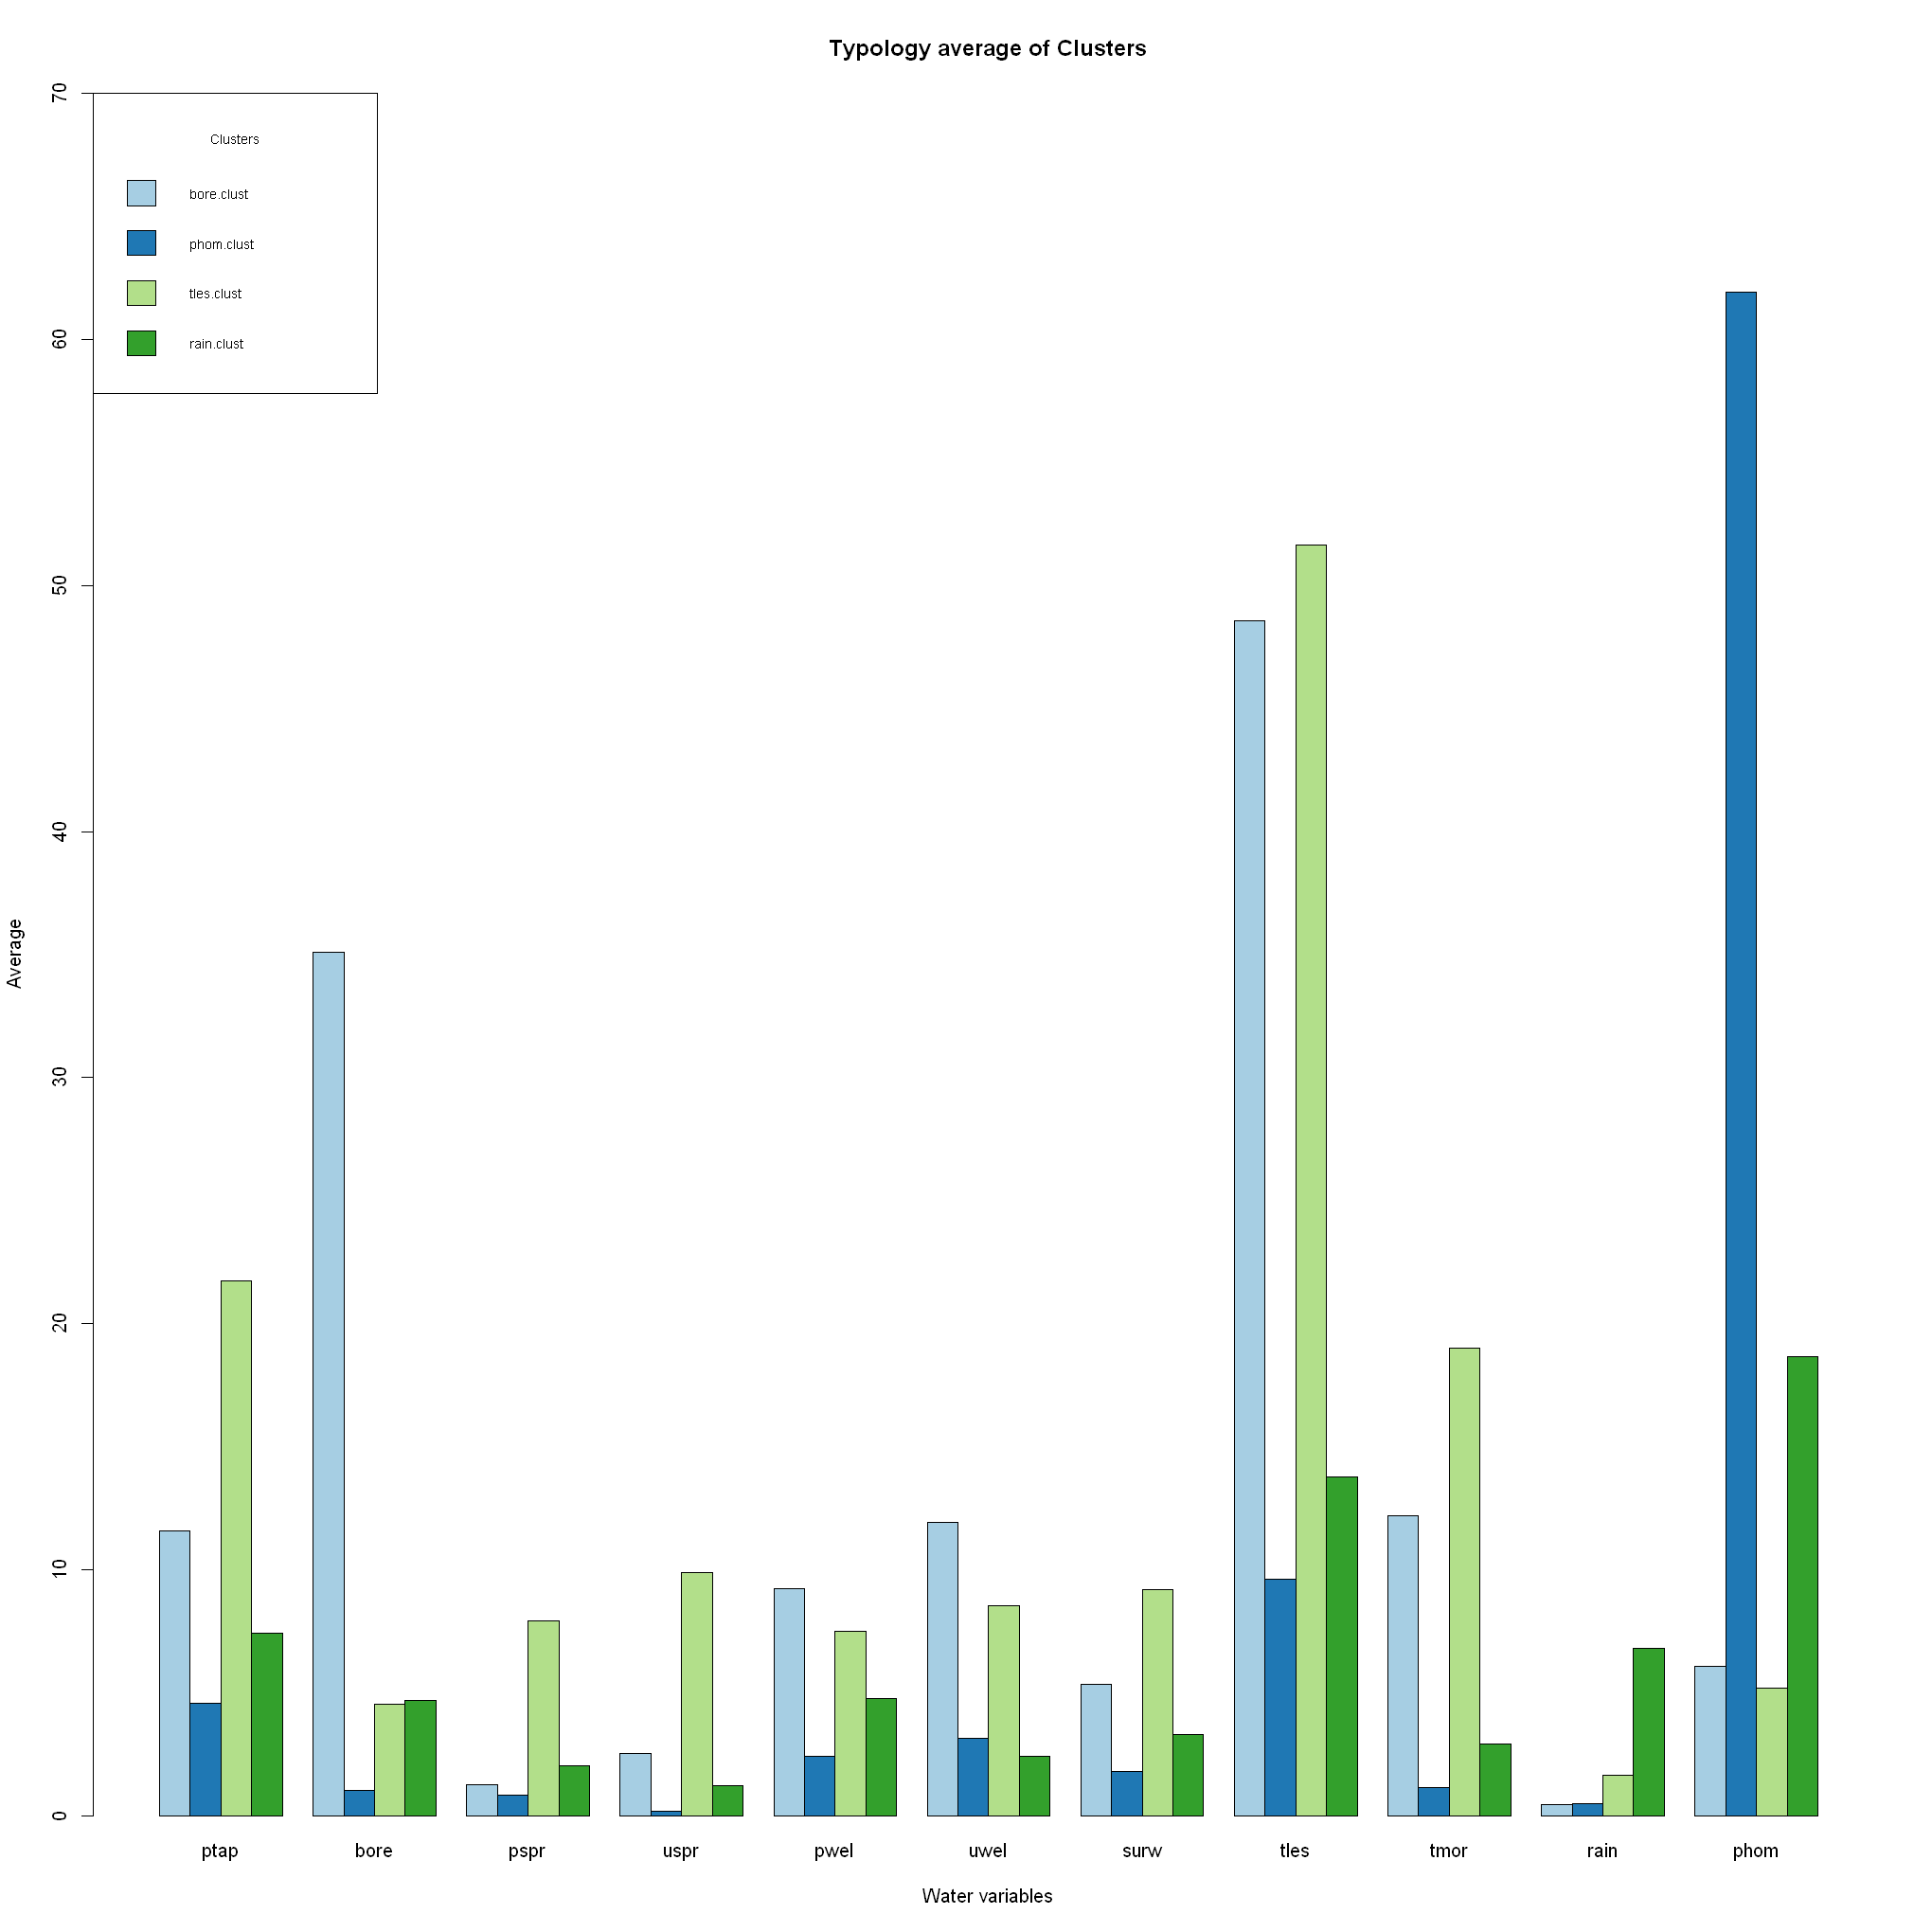

In [113]:
centroid <- apply(df.wa.aggregate, 1, function(x) sqrt(sum(x^2)) ) #How close is each country to the centroid of the cluster
centroid
old.par <- par(mar = c(0, 0, 0, 0))
par(old.par)

bp <- barplot(centroid,
        main = "Centroid of the Clusters", xlab = "Clusters", ylab = "fitness of Centroid",
        col = c("#a6cee3",  "#1f78b4",  "#b2df8a",  "#33a02c"),
        ylim = c(0, 100), names.arg = c("bore.clust", "phom.clust", "tles.clust","rain.clust"))
text(bp, 0, round(centroid, 1),cex=1,pos=3)

barplot(as.matrix(df.wa.aggregate),
        beside = TRUE,
        main = "Typology average of Clusters", xlab = "Water variables", ylab = "Average",
        col = c("#a6cee3",  "#1f78b4",  "#b2df8a",  "#33a02c"),
        legend = c("bore.clust", "phom.clust", "tles.clust","rain.clust"), 
        args.legend = list(title = "Clusters", x = "topleft", cex = .7), ylim = c(0, 70))


centroiddf.wa <- apply(df.wa, 1, function(x) sqrt(sum(x^2)) ) #How close is each country to the cen-troid of the cluster
head(centroiddf.wa)


In [114]:
centroiddf.wa
str(centroiddf.wa)

[1] 57.75967 53.28292 54.85690 88.32214 42.05627 89.50240 64.37391 28.76717
 [9] 69.20000 76.72092 88.75624 44.78750 66.13857 79.02082 79.18819 81.18885
[17] 39.24245 55.64369 80.22375 57.33053 13.10382 90.85945 65.44883 55.00382
[25] 67.50733 41.63136 60.62631 53.16587 22.34905 66.30596 31.45282 75.16056
[33] 44.41002 55.57311 29.32013 57.27032 63.64181 51.42402 48.65480 71.27419
[41] 89.98844 75.36909 92.03103 48.64535 74.84424 66.99052 56.79067 60.48959
[49] 57.81488 58.18178 60.08261 50.83296 38.00342 79.16533 73.74429 62.31934
[57] 64.78958  0.00000 74.44542 29.94528 79.18188 83.13032 33.69688 75.43202
[65] 50.37896 39.62436 52.24577 44.32945 74.40612 50.85637 30.51754 73.76341
[73] 59.98983 67.12101 13.40298 17.06136 63.95545 62.46759

 num [1:78] 57.8 53.3 54.9 88.3 42.1 ...


# Radar Plot for the aggregated data

ptap      bore      pspr      uspr      pwel      uwel      surw      tles 
4.5642857 1.0285714 0.8500000 0.1785714 2.4214286 2.4454545 1.8071429 9.6357143 
     tmor      rain      phom 
1.1428571 0.4590909 5.1800000

ptap      bore      pspr      uspr      pwel      uwel      surw      tles 
21.725000 35.109091  7.935000  9.885000  9.254545 11.950000  9.185000 51.660000 
     tmor      rain      phom 
19.000000  6.795455 61.928571

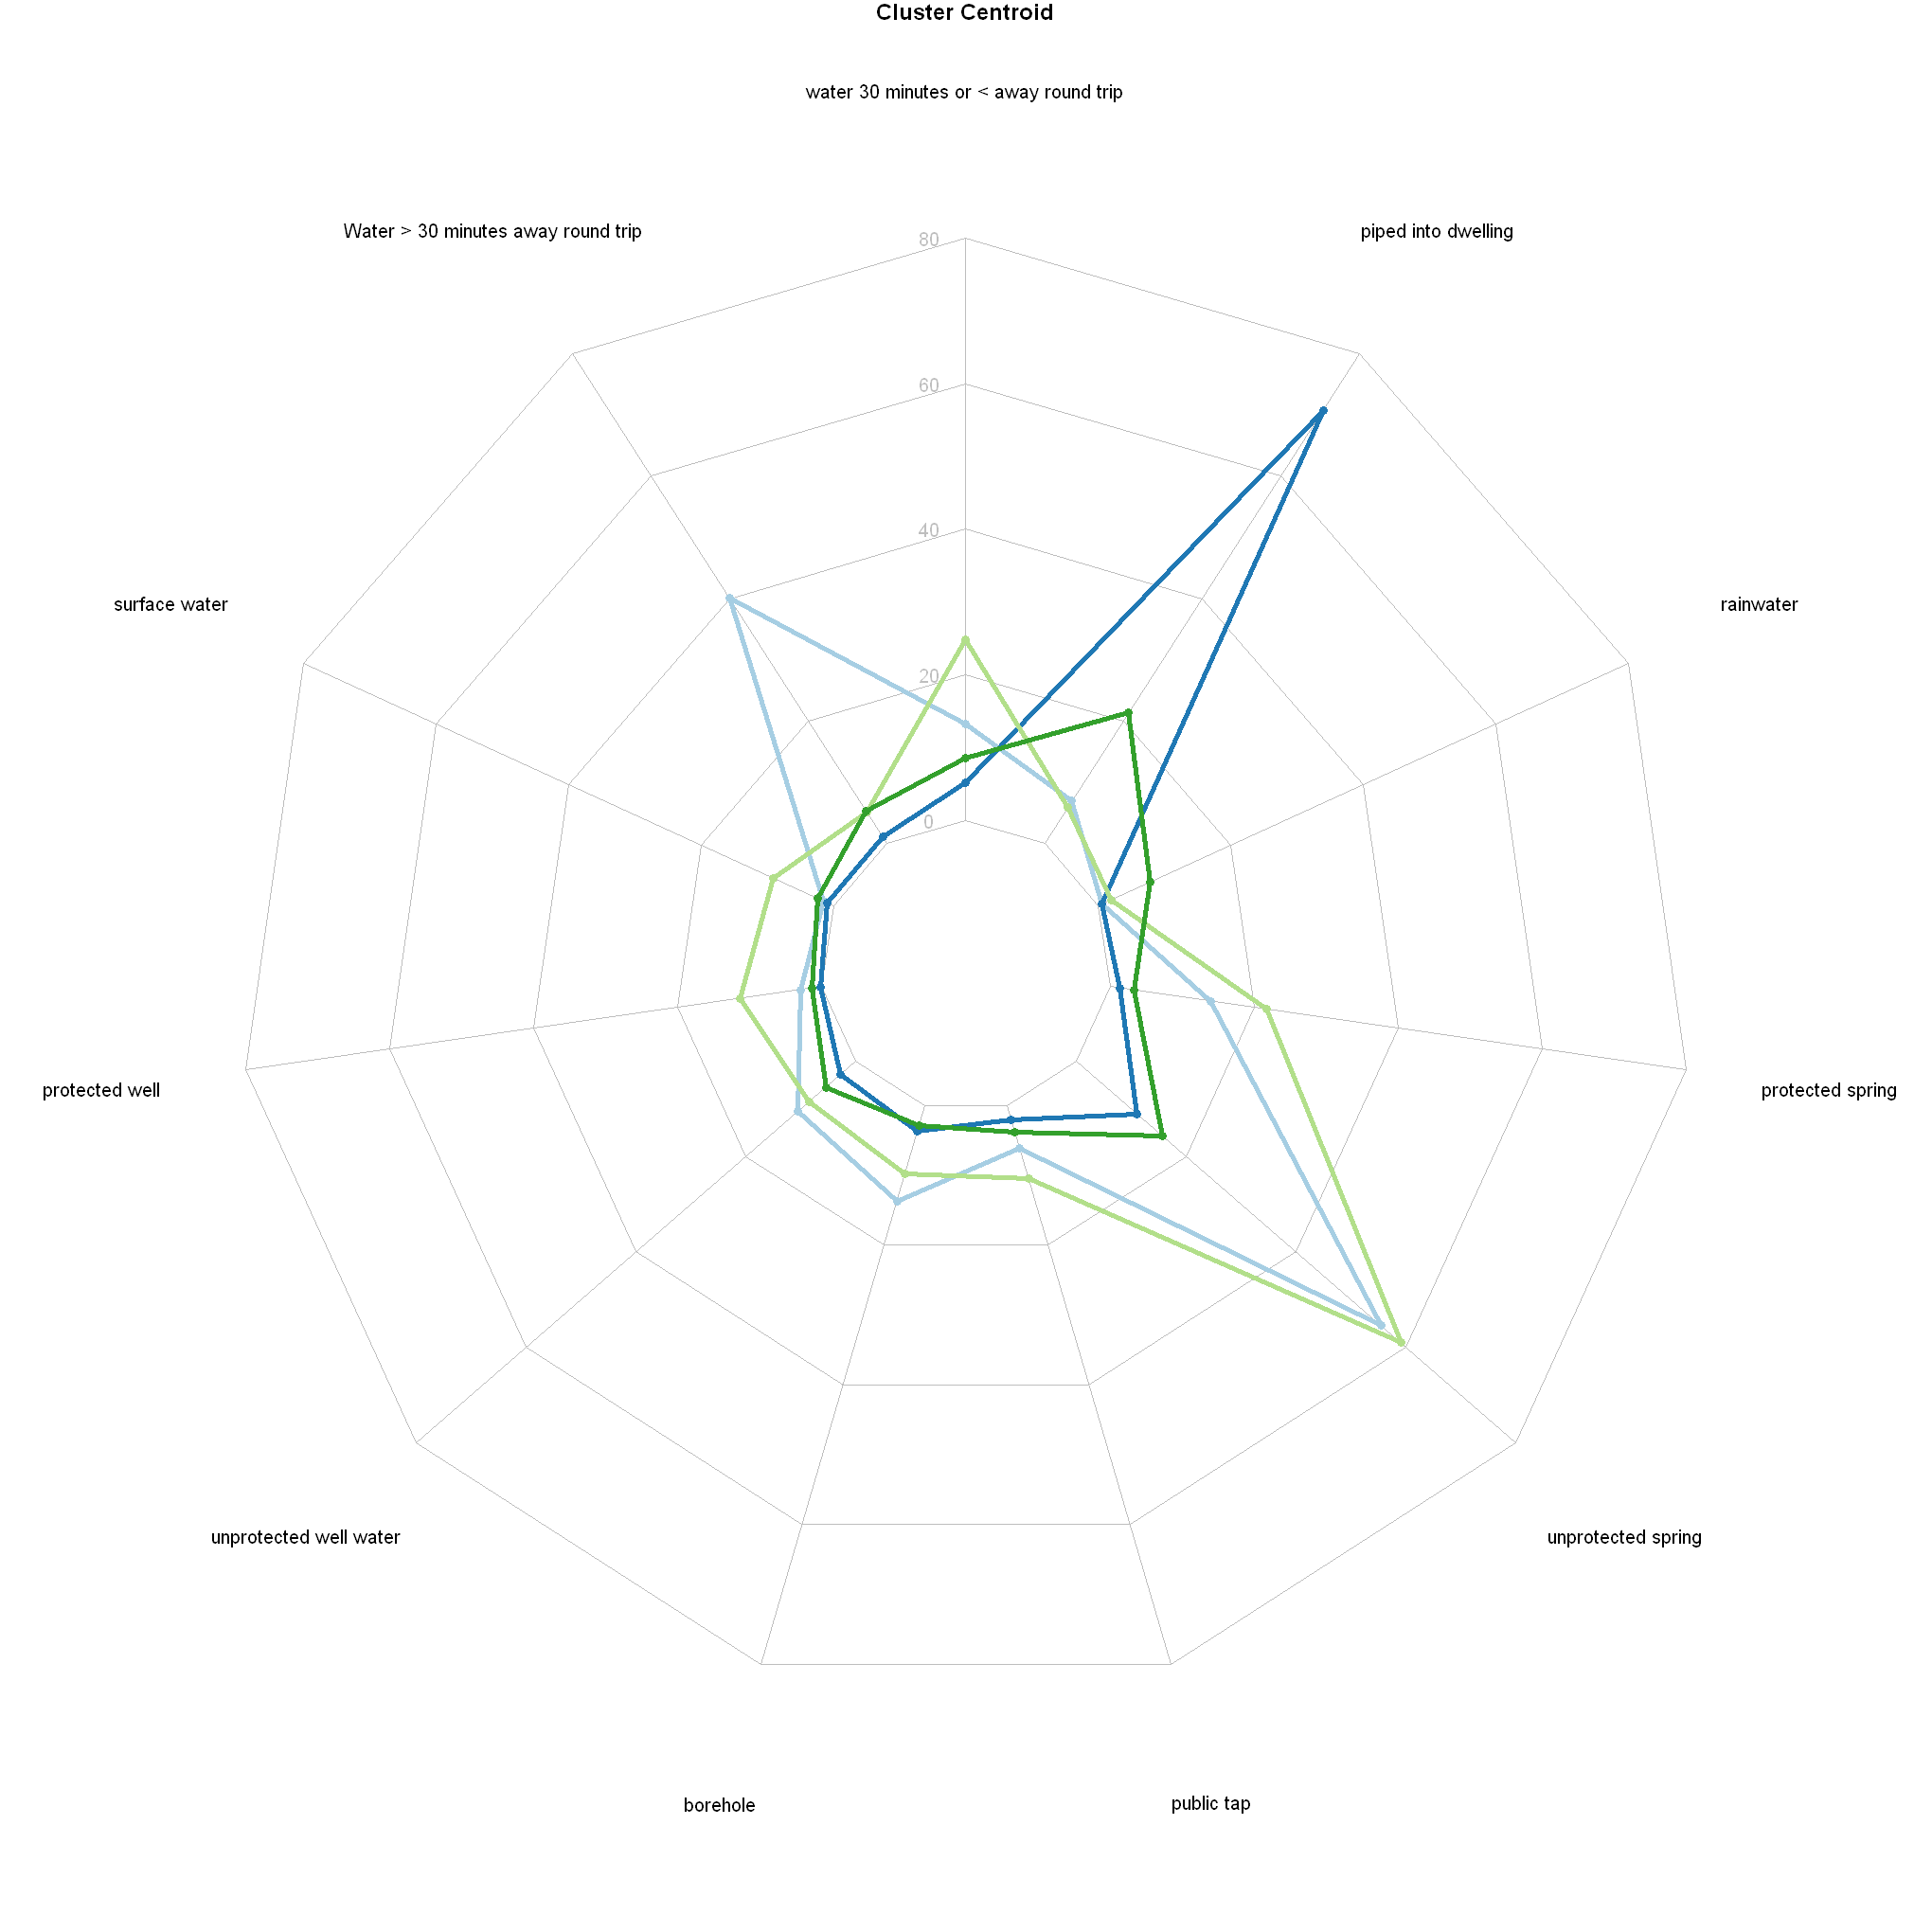

In [120]:
# To use the fmsb package, I have to add 2 lines to the data frame: the max and min of each topic to show on the plot!
max.aggregate = apply(df.wa.aggregate,2,max)
apply(df.wa.aggregate,2,min)
max.aggregate

norm.df.wa <- sweep(df.wa.aggregate, 2, max.aggregate, FUN = '/')
data.spider <- rbind(rep(70,70) , rep(0,10) , df.wa.aggregate)
colnames(data.spider) <- c("water 30 minutes or < away round trip" , "Water > 30 minutes away round trip" , "surface water" , "protected well" , "unprotected well water", "borehole" , "public tap" , "unprotected spring", "protected spring", "rainwater" ,"piped into dwelling")

options(repr.plot.width=17, repr.plot.height=17)
par(mar = c(1,1,1,1))
par(cex=1)

# The default radar chart for First Cluster
r.c. <- radarchart(data.spider,
           #custom polygon
           pcol= c("#a6cee3",  "#1f78b4",  "#b2df8a",  "#33a02c") ,
           plwd=4 , plty=1,
           #custom the grid
           cglcol="grey", cglty=1, axislabcol="grey", caxislabels= seq(0,80,20), cglwd=0.8, axistype = 4,
           title = 'Cluster Centroid',
           vlcex=1,
           calcex = 1 ,
                   
           )

# Box Plot of Water Accessibility Variables (Violin Plots)

ptap,bore,pspr,uspr,pwel,uwel,surw,tles,tmor,rain,phom
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
11.586364,35.109091,1.290909,2.5590909,9.254545,11.950000,5.350000,48.554545,12.195455,0.4590909,6.086364
4.564286,1.028571,0.850000,0.1785714,2.421429,3.157143,1.807143,9.635714,1.142857,0.5214286,61.928571
21.725000,4.535000,7.935000,9.8850000,7.490000,8.555000,9.185000,51.660000,19.000000,1.6750000,5.180000
7.436364,4.681818,2.045455,1.2454545,4.781818,2.445455,3.318182,13.790909,2.940909,6.7954545,18.672727


[1] "factor" "factor" "factor" "factor" "factor" "factor" "factor" "factor"
 [9] "factor" "factor" "factor"

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"position_dodge requires non-overlapping x intervals"


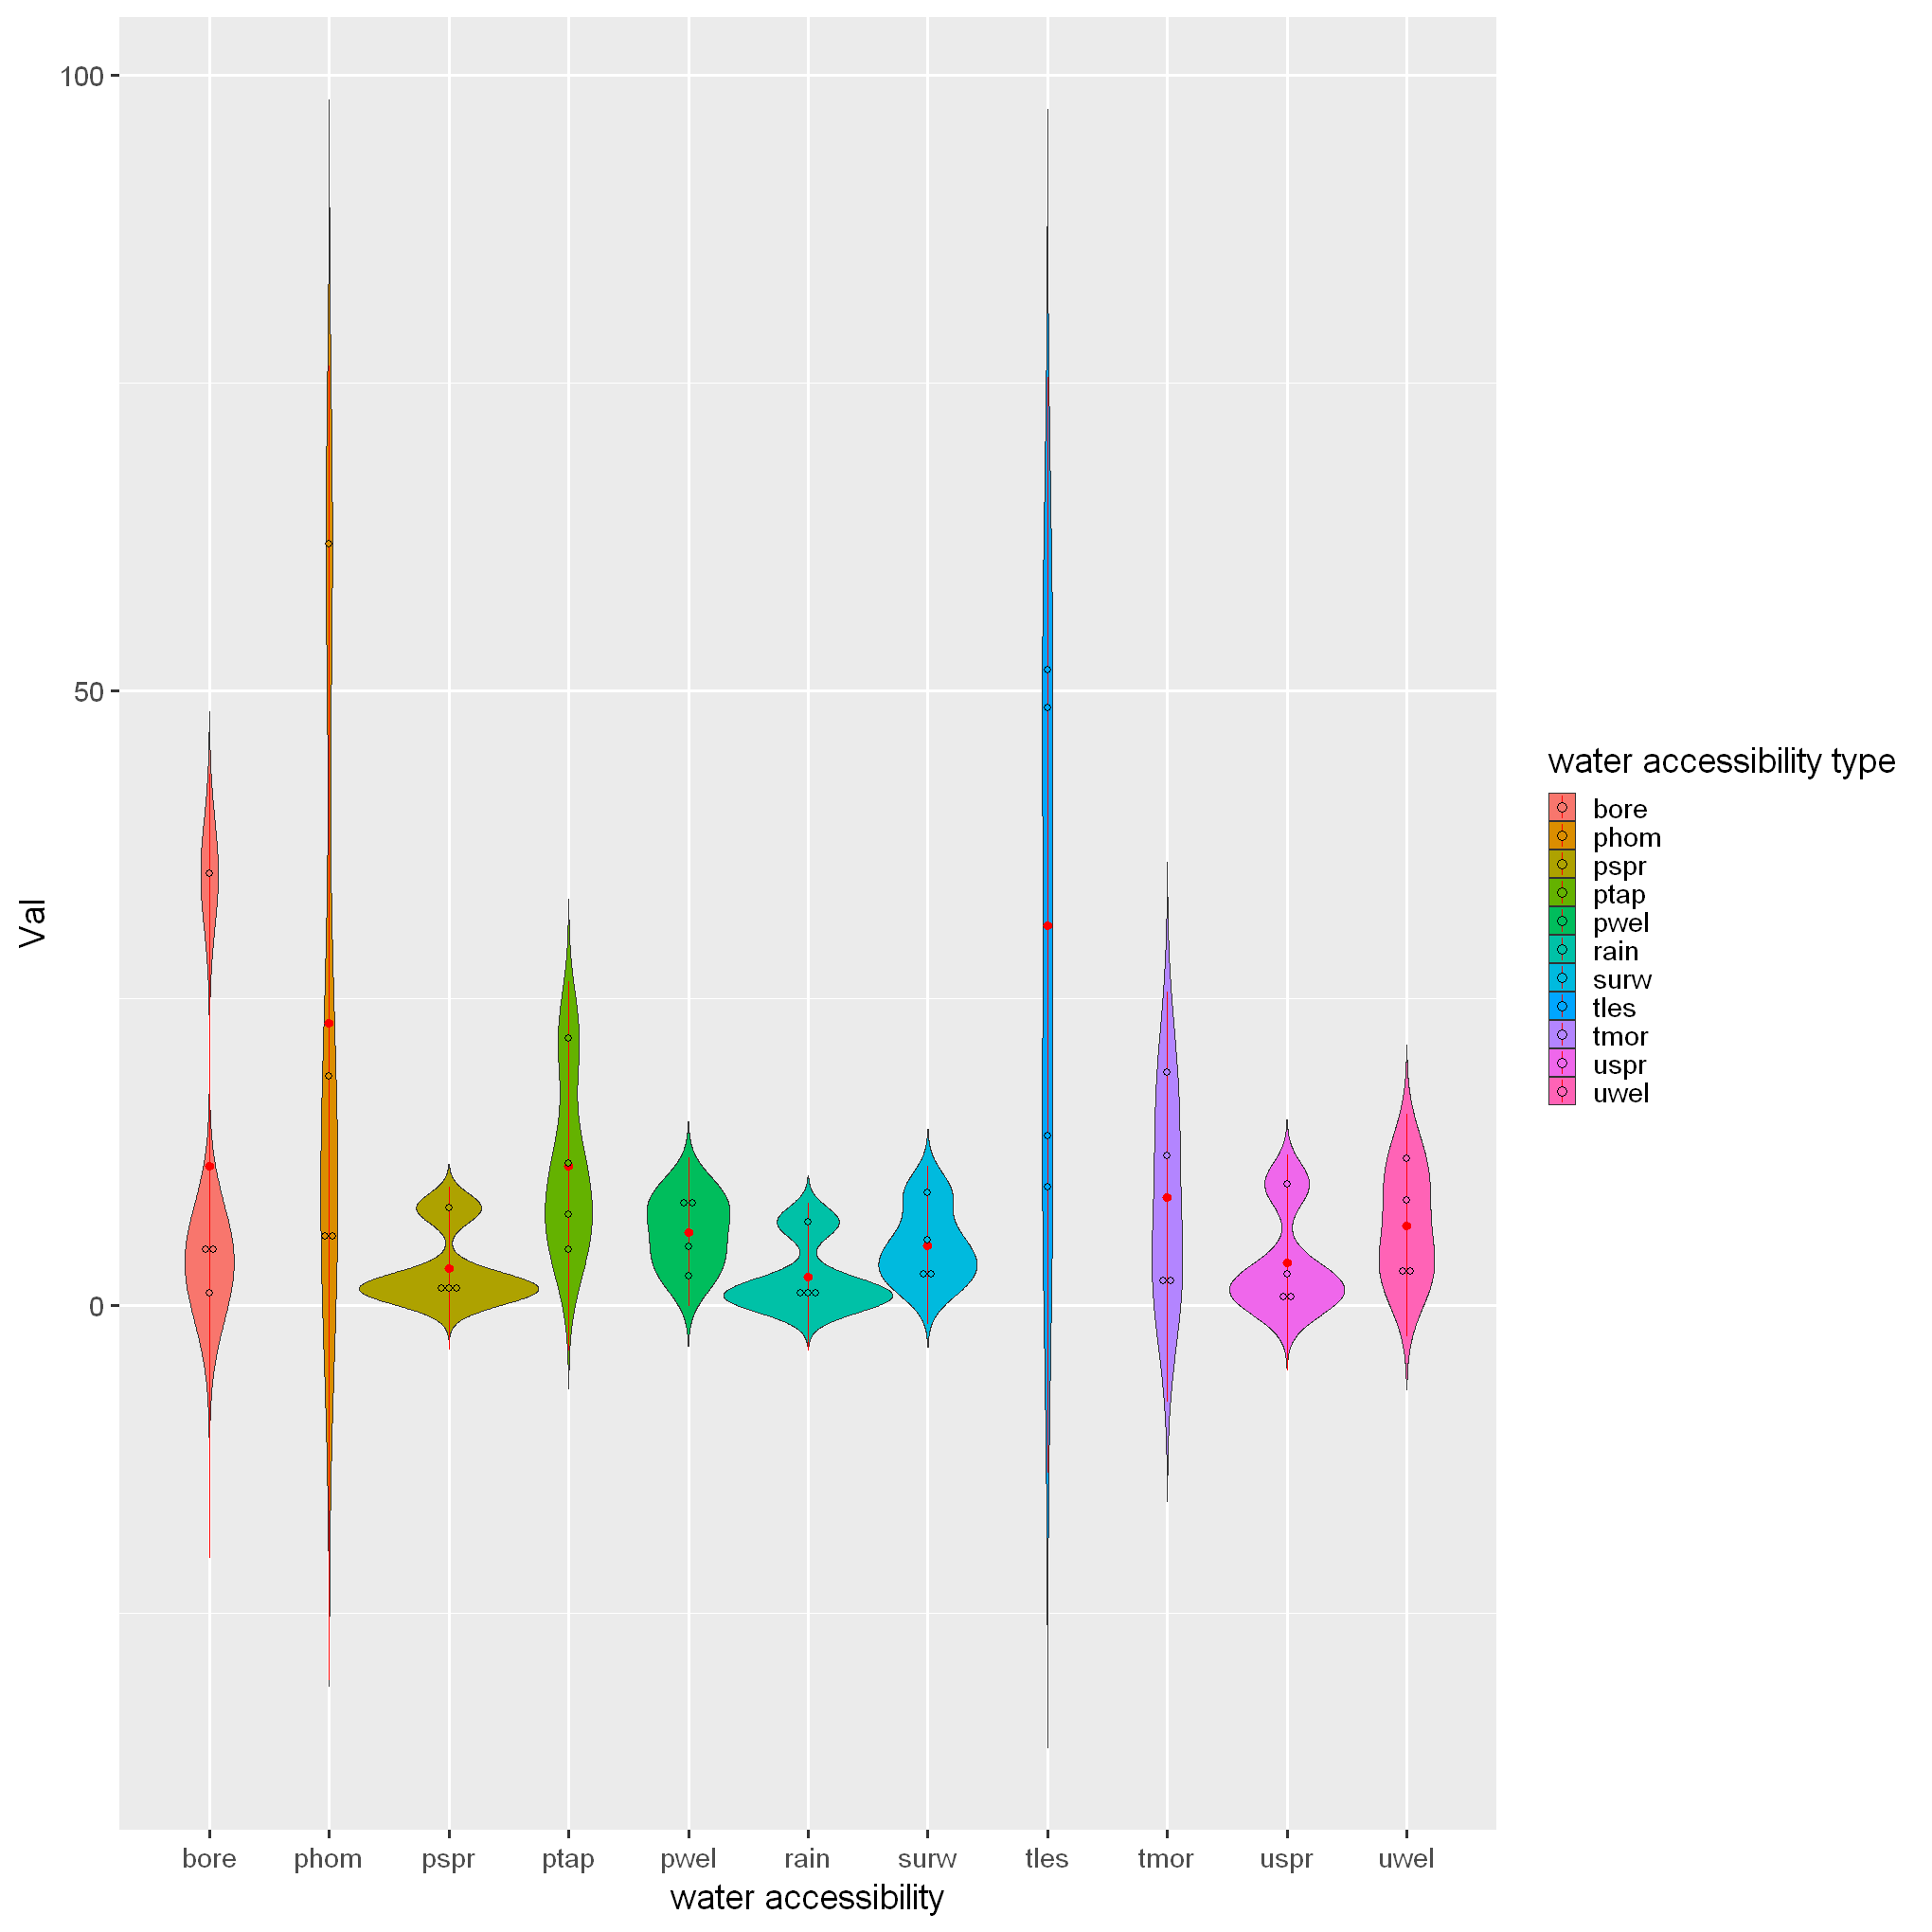

In [70]:
df.wa.aggregate <- aggregate(df.wa, list(clusters=dfsimple$clusters), mean)
df.wa.aggregate <- df.wa.aggregate[,2:12]
df.wa.aggregate
rownames(df.wa.aggregate) <- c('A','B','C','D')

data_wa <- df.wa.aggregate[  , 1:11]

df.wa.aggregate <- as.factor(df.wa.aggregate[,])
sapply(df.wa.aggregate, class)


options(repr.plot.width=17, repr.plot.height=17)
par(mar = c(1,1,1,1))
par(cex=5)

p <- data_wa %>% 
    gather(key="MesureType", value="Val") %>%
    ggplot( aes(x=MesureType, y=Val, fill=MesureType)) +
    geom_violin(trim=FALSE, width=1.5, size=.3) + 
    
    stat_summary(fun.data=mean_sdl, geom="pointrange", color="red") + 
    scale_color_brewer(palette="Dark2") +
    xlab('water accessibility') +
    geom_dotplot(binaxis='y', stackdir='center', dotsize=.3) +
    guides(fill =guide_legend("water accessibility type"))
p <- p + theme_grey(base_size = 22)
p 


# Country's Centroids Rankings Demo


 1  2  3  4 
22 14 20 22 

clusters,ptap,bore,pspr,uspr,pwel,uwel,surw,tles,tmor,rain
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,11.586364,35.109091,1.290909,2.5590909,9.254545,11.950000,5.350000,48.554545,12.195455,0.4590909
2,4.564286,1.028571,0.850000,0.1785714,2.421429,3.157143,1.807143,9.635714,1.142857,0.5214286
3,21.725000,4.535000,7.935000,9.8850000,7.490000,8.555000,9.185000,51.660000,19.000000,1.6750000
4,7.436364,4.681818,2.045455,1.2454545,4.781818,2.445455,3.318182,13.790909,2.940909,6.7954545


clusters      ptap      bore      pspr      uspr      pwel      uwel      surw 
 "factor" "numeric" "numeric" "numeric" "numeric" "numeric" "numeric" "numeric" 
     tles      tmor      rain 
"numeric" "numeric" "numeric"

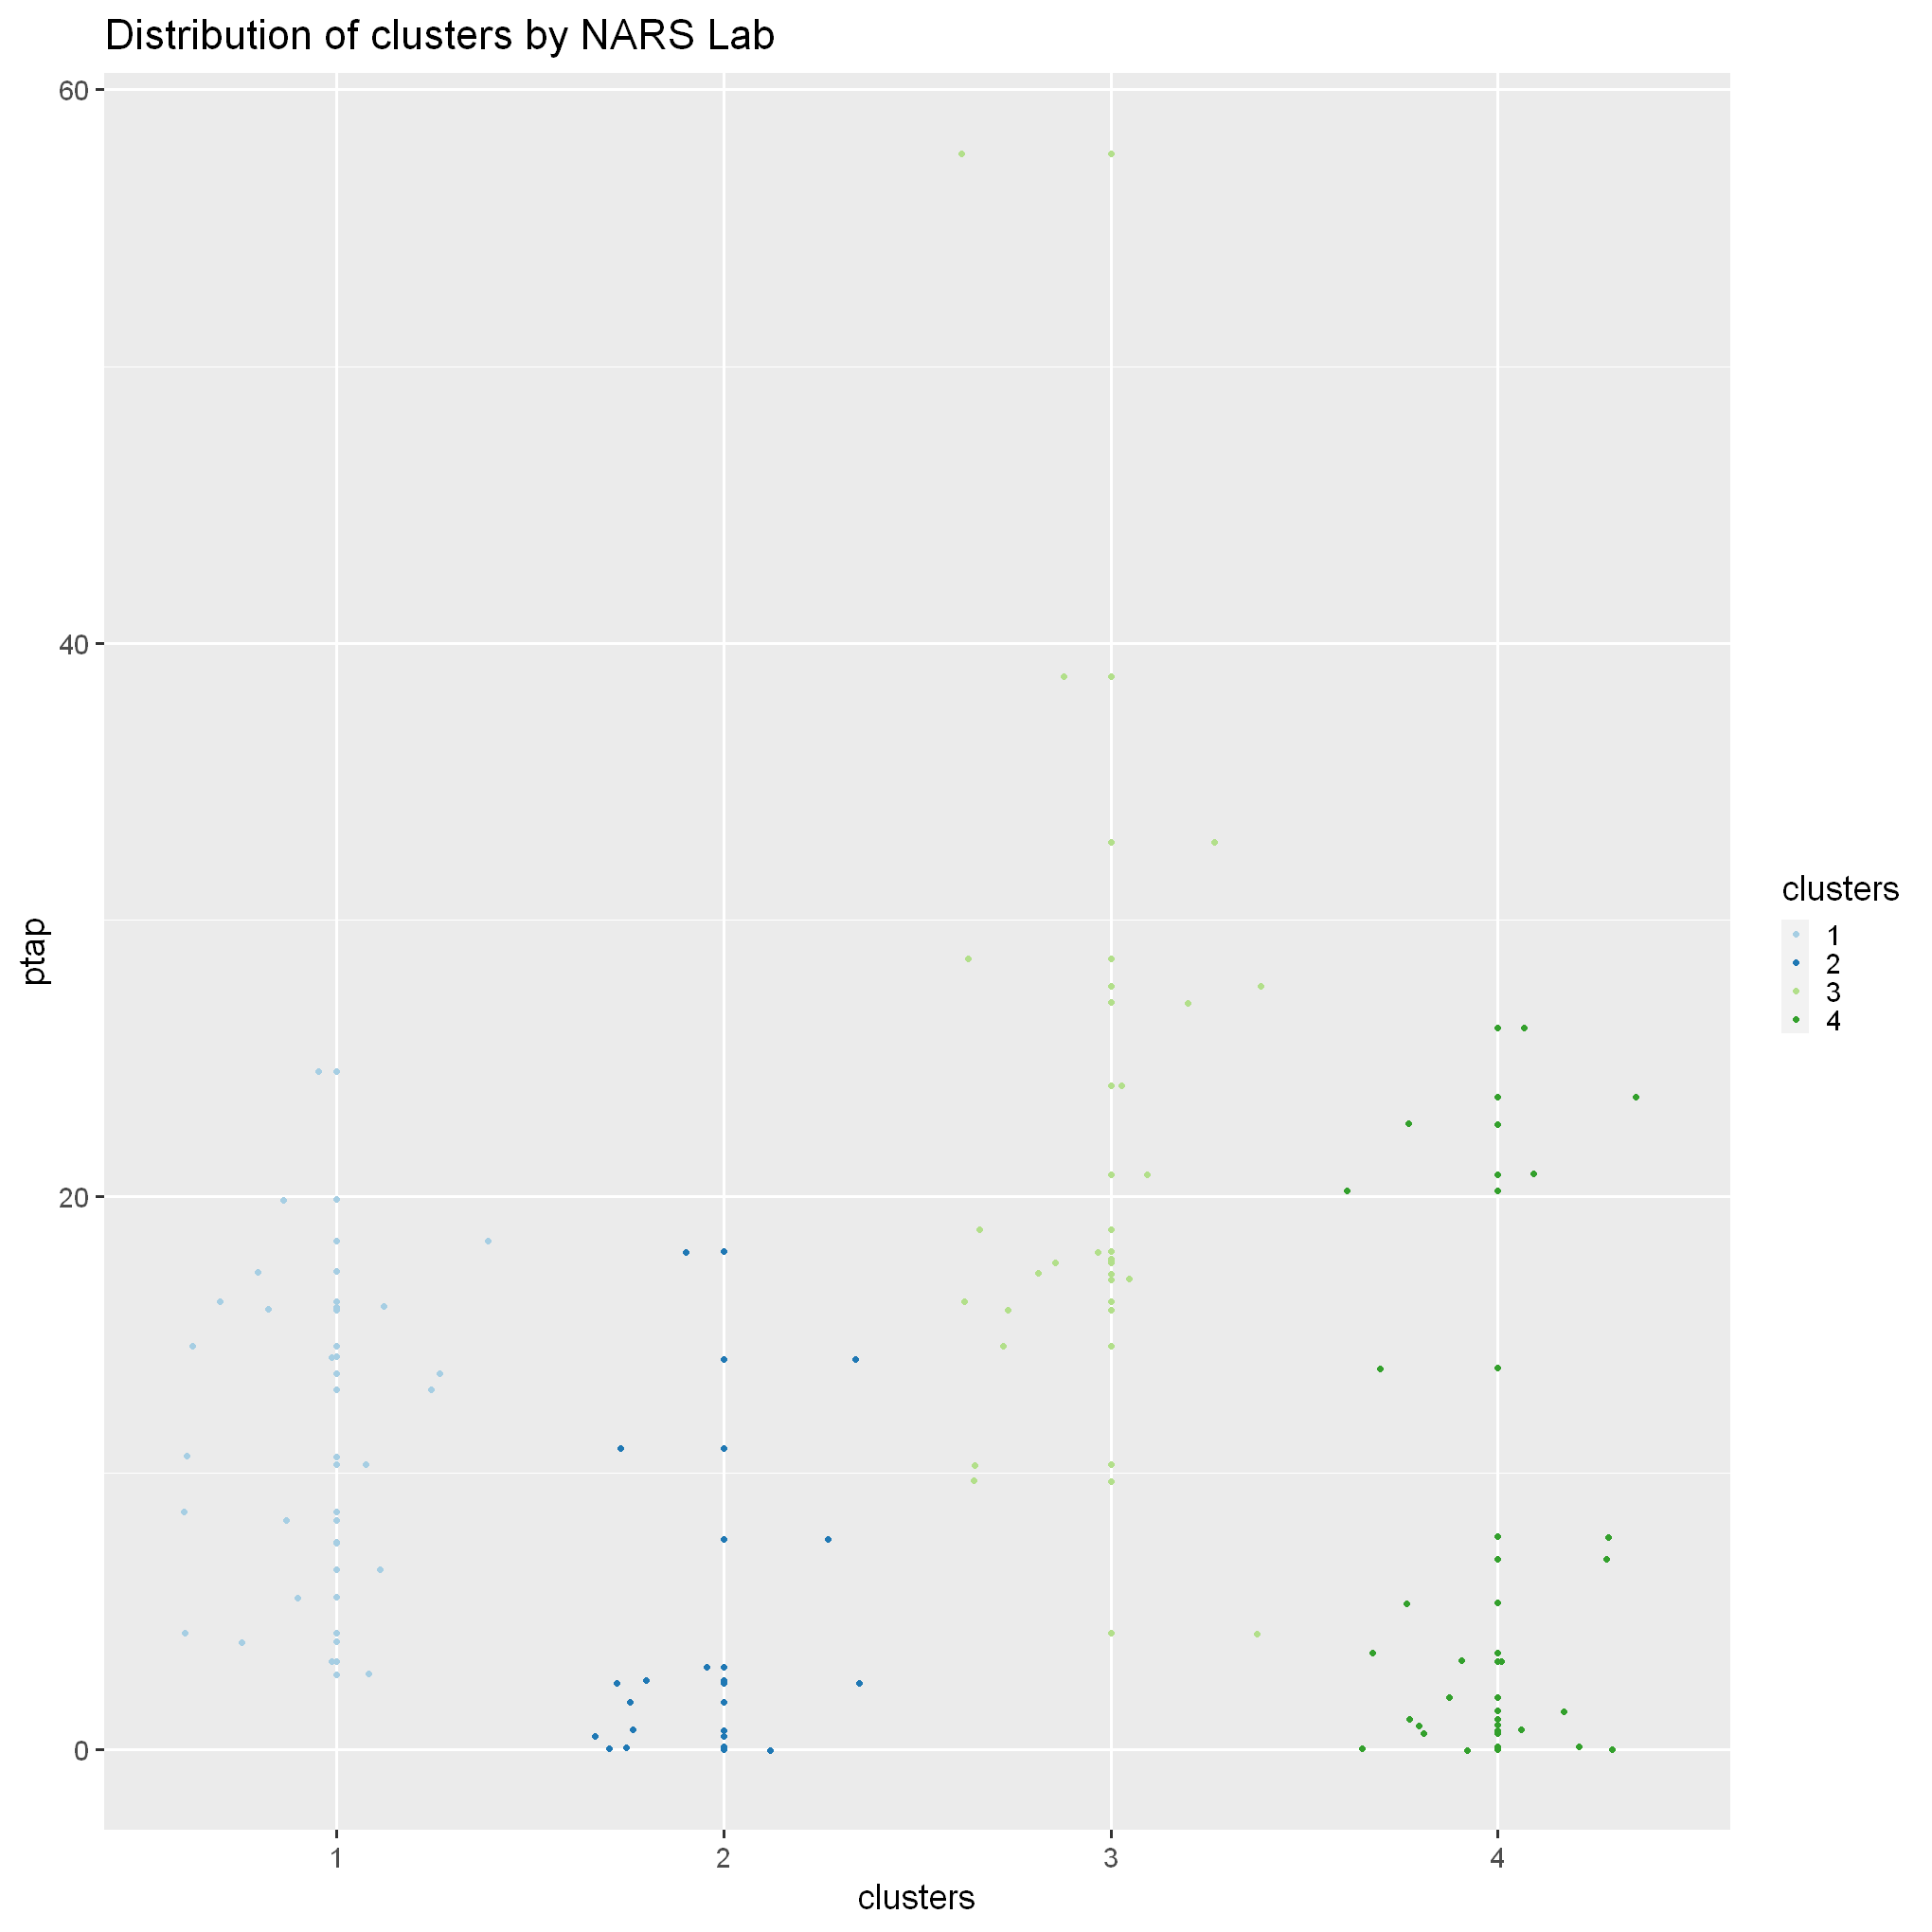

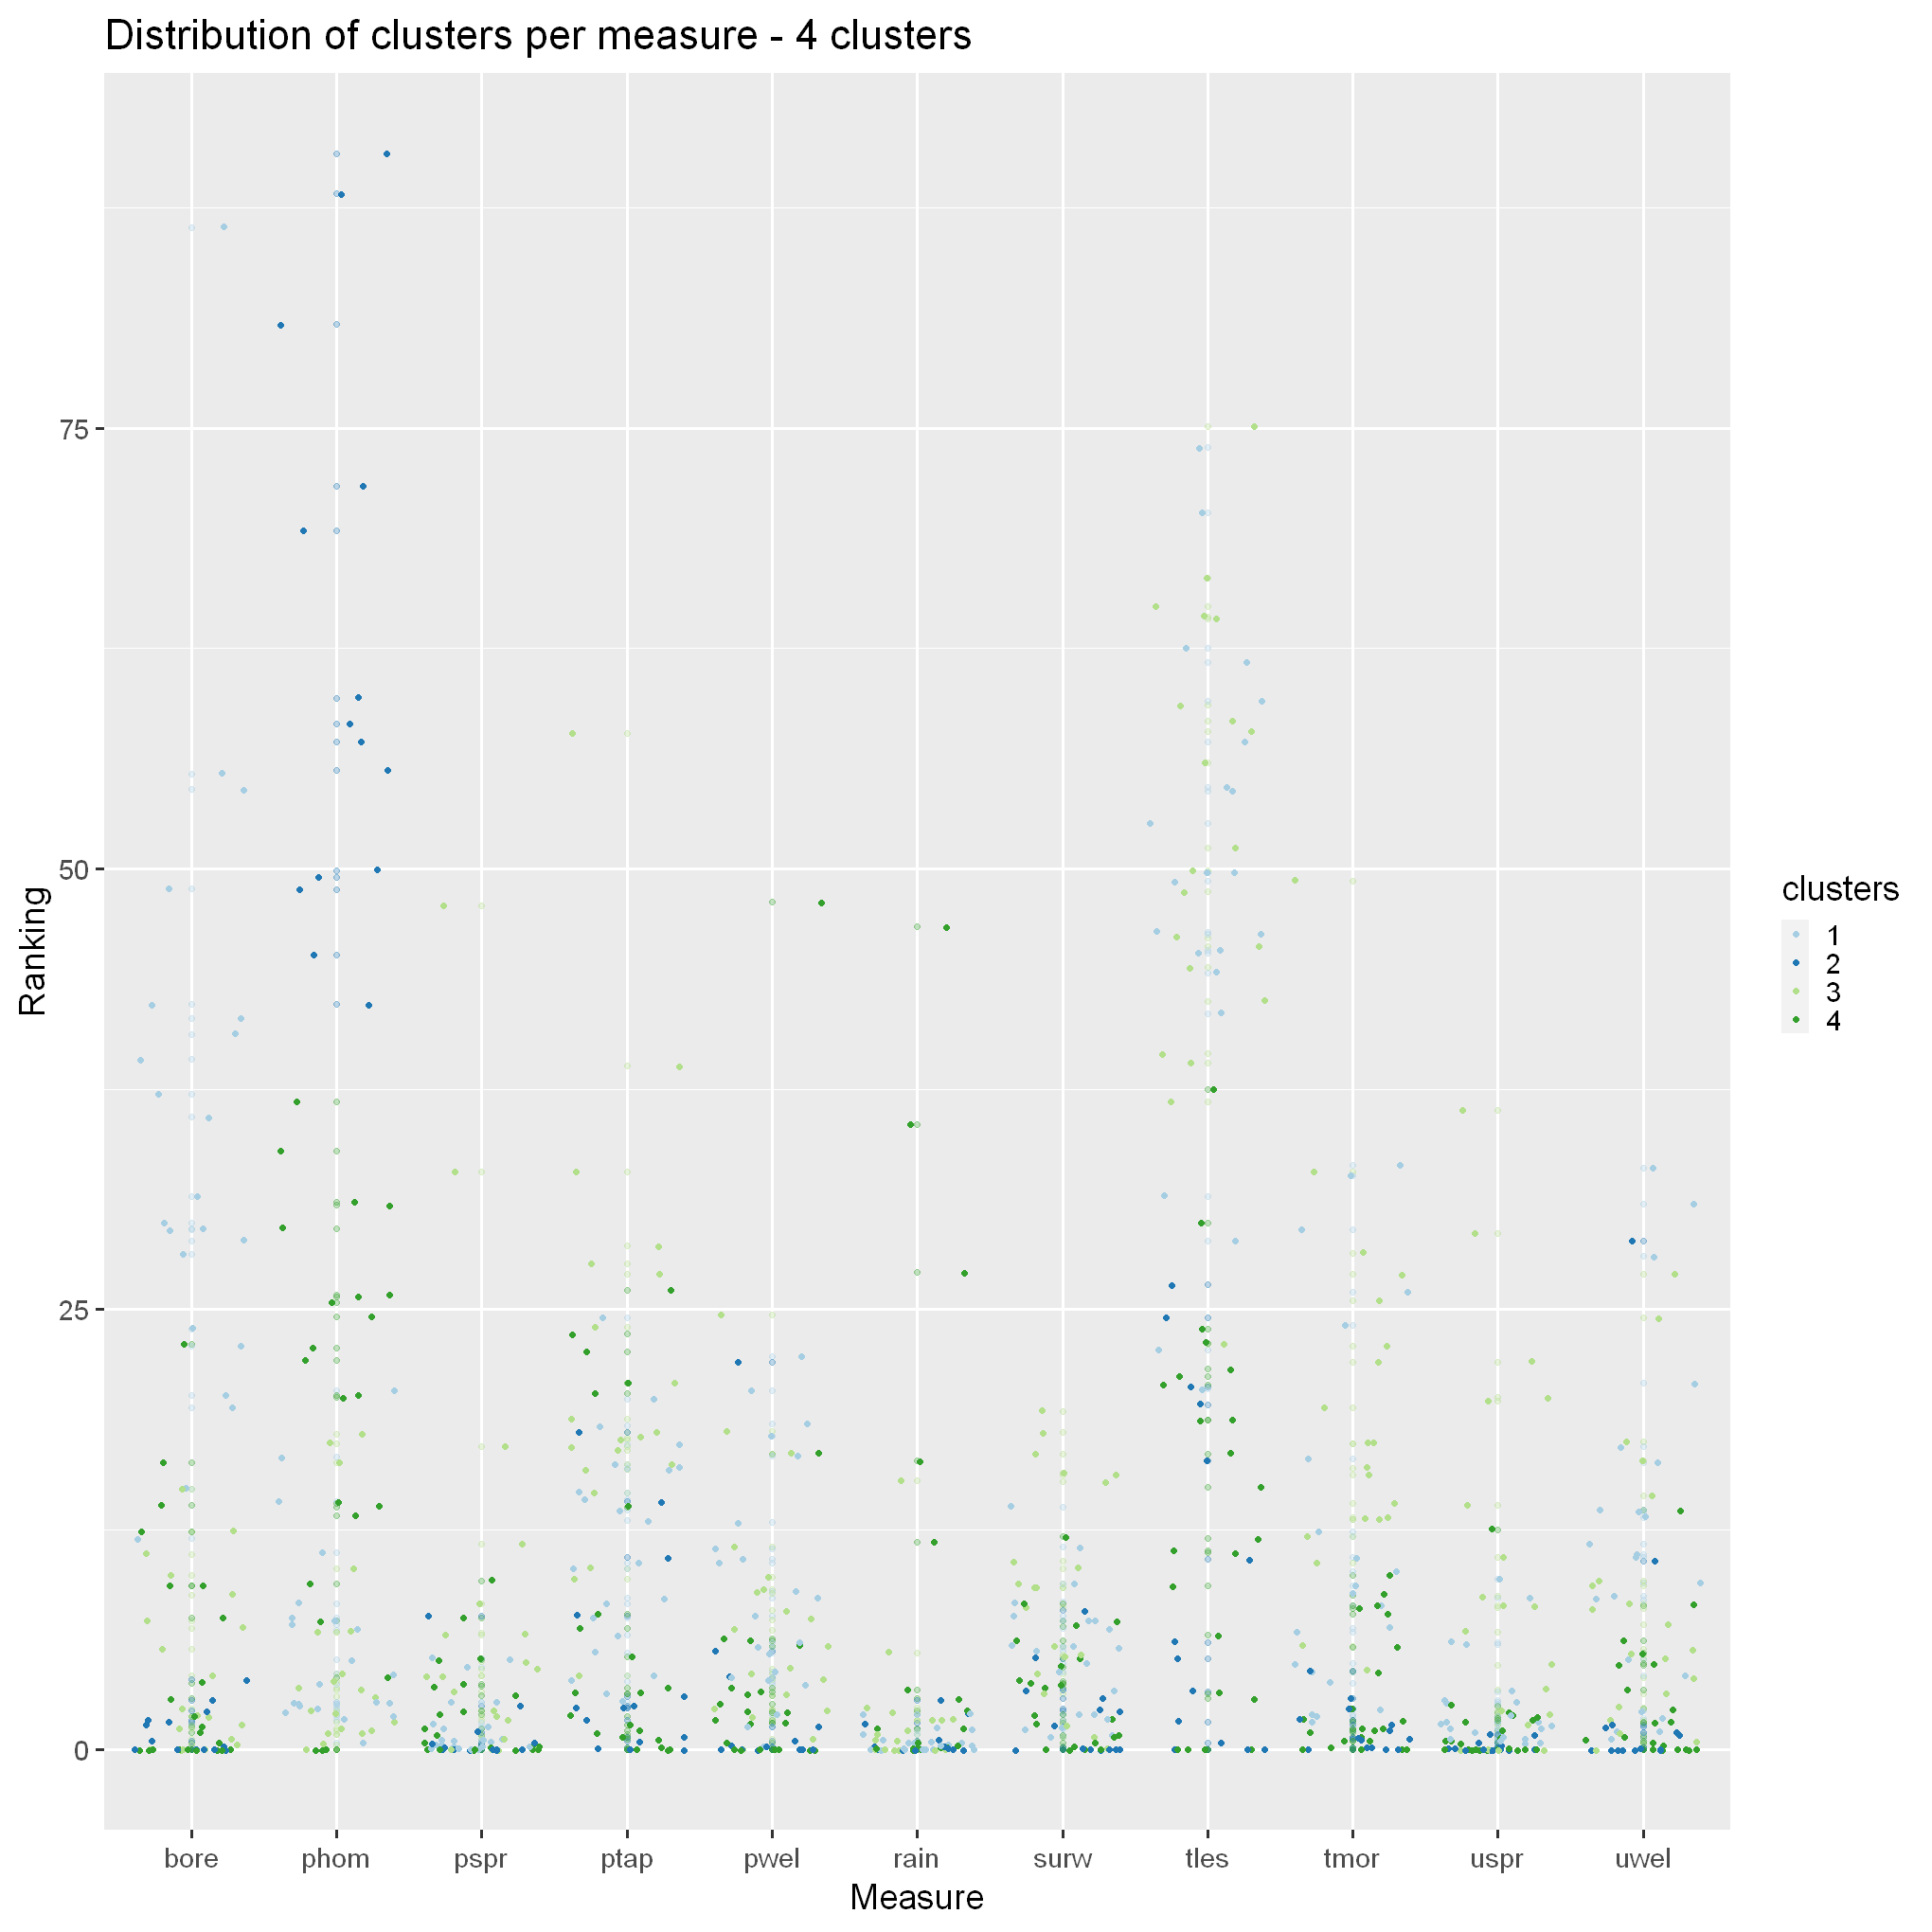

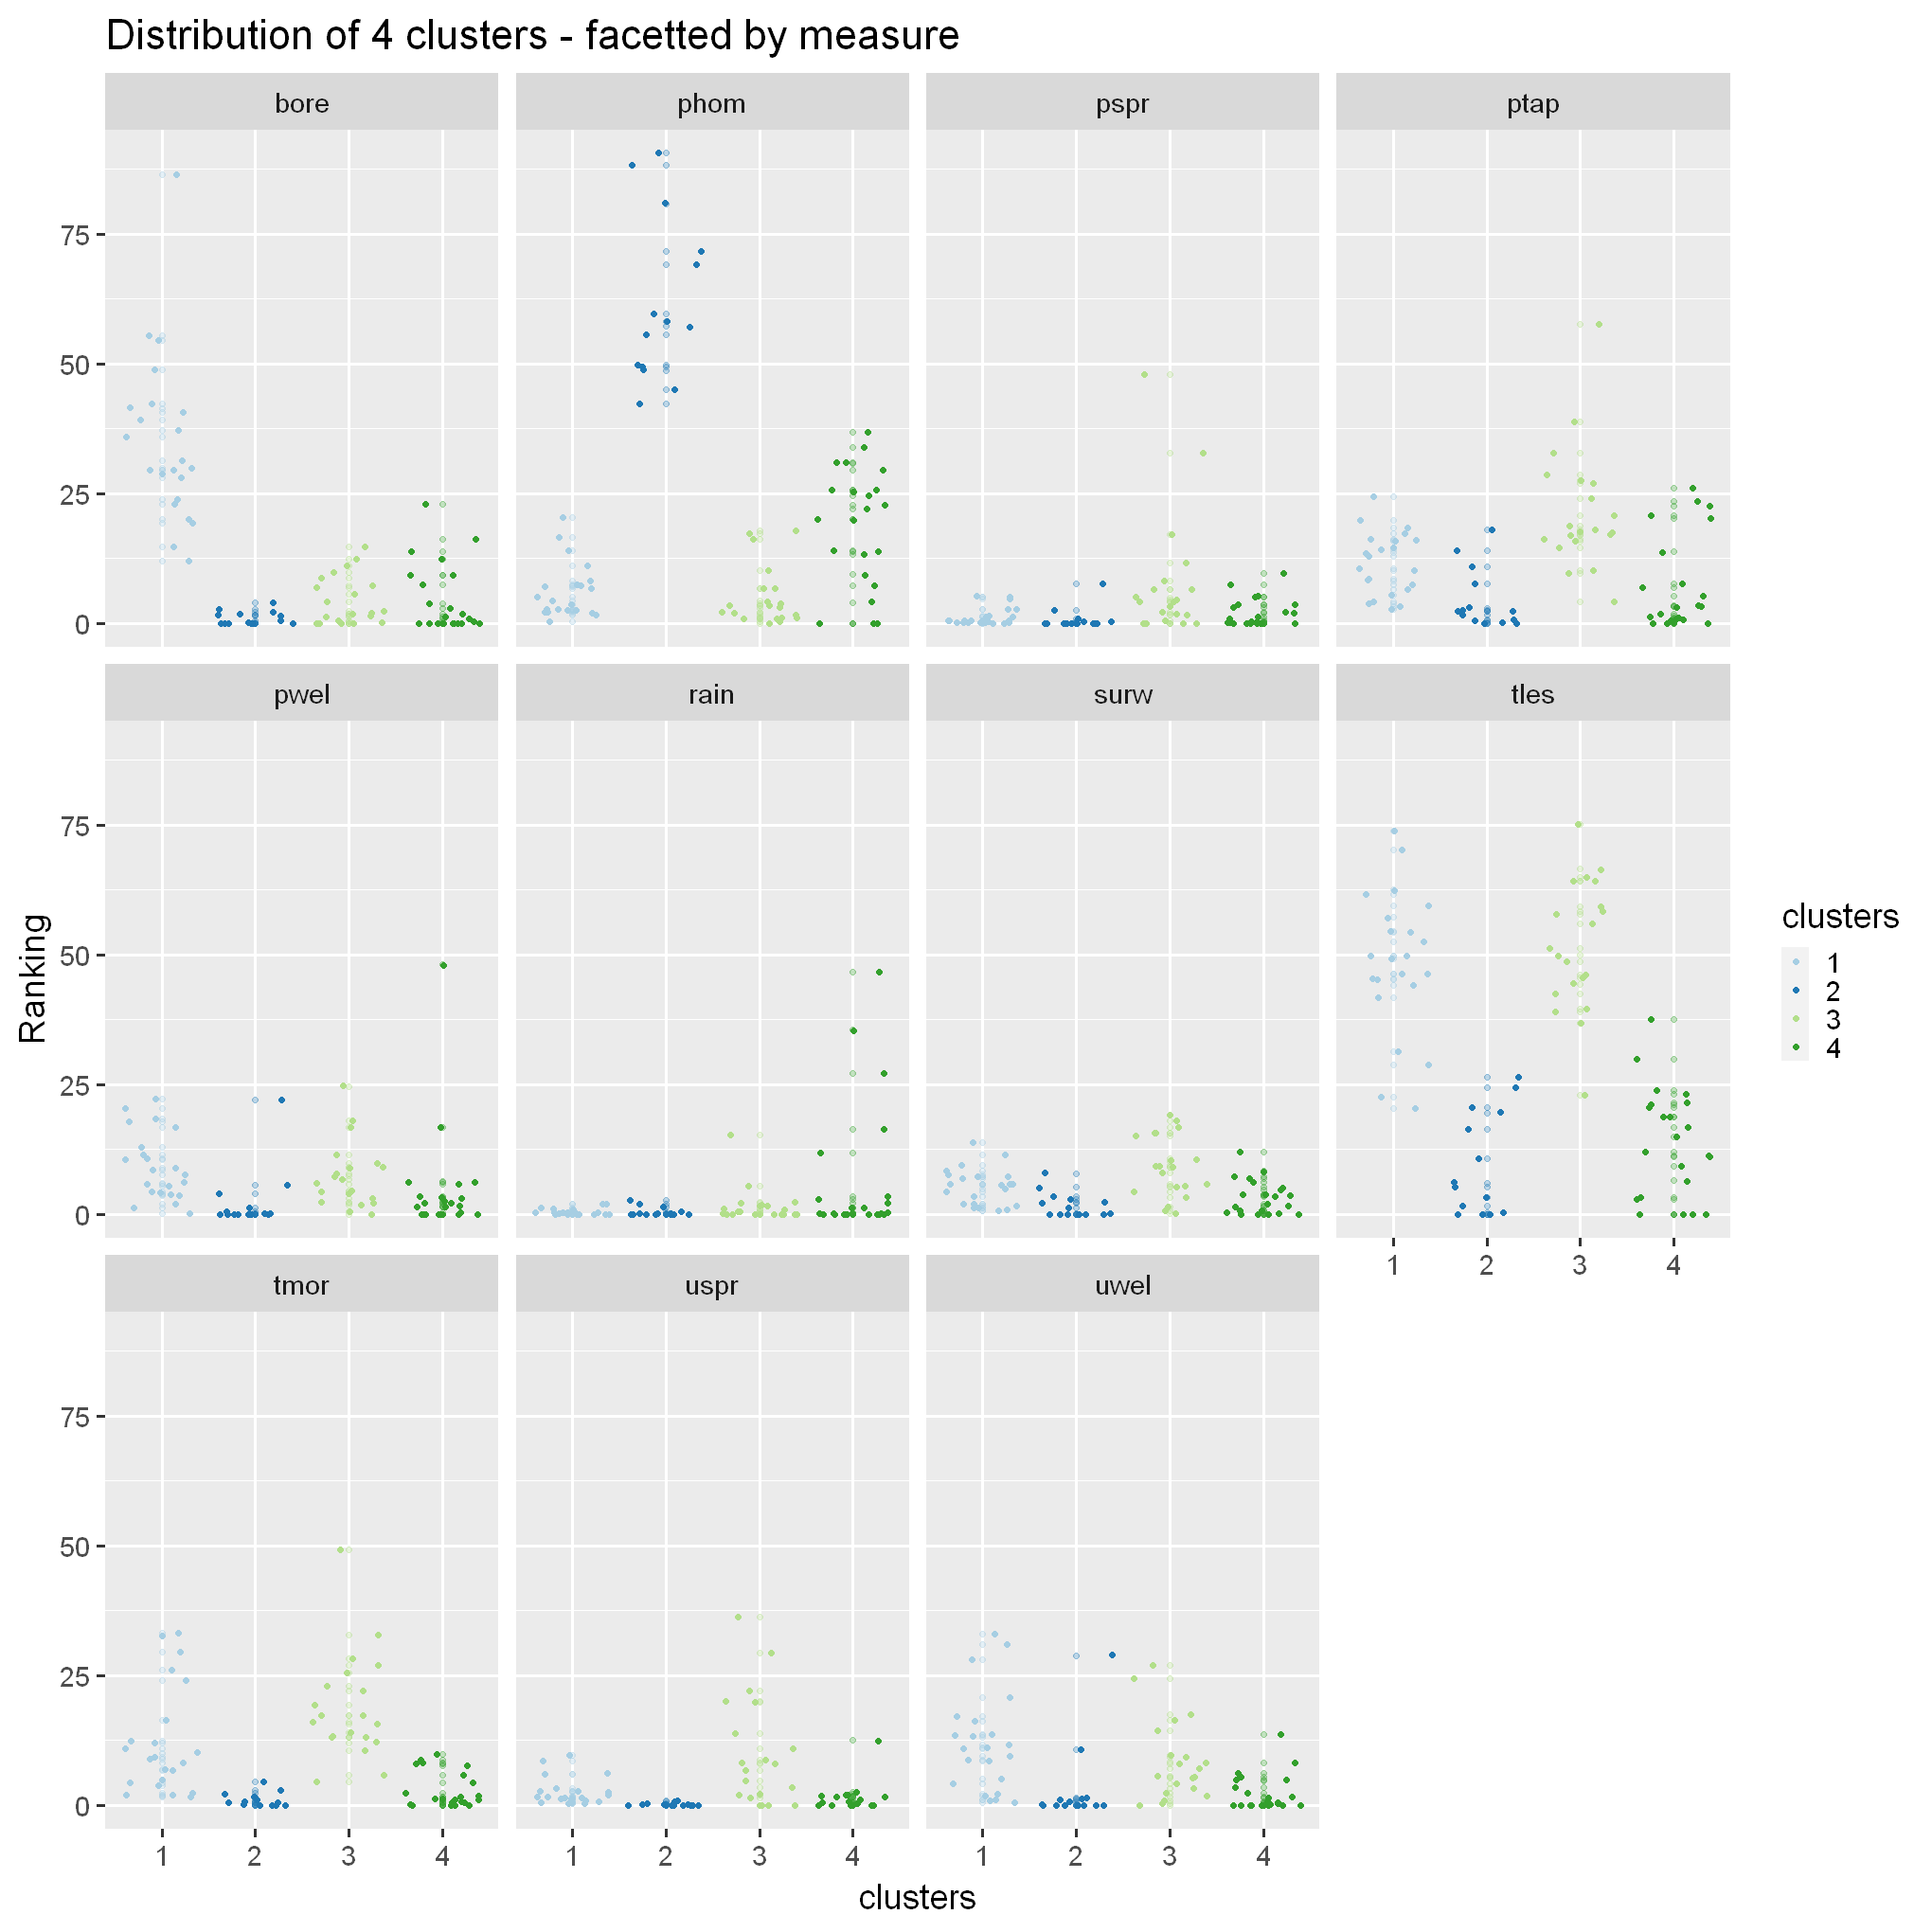

In [130]:
#data_wa$cluster <- cutree(hc.ward2,4) 
df.wa <- dfsimple[,c('ptap','bore','pspr', 'uspr', 'pwel', 'uwel','surw','tles','tmor','rain','phom' )]
hc.ward2=hclust(dist(df.wa), method ="ward.D2")
df.wa$clusters <- cutree(hc.ward2,4)
df.wa$clusters <- as.factor(df.wa$clusters)

p <- ggplot(df.wa, aes(clusters, ptap, color = clusters, fill = clusters)) +
  geom_point(alpha = 0.6) +
  geom_jitter() +
  geom_point() +
  ggtitle("Distribution of clusters by NARS Lab") +
  scale_color_manual(values=c("#a6cee3",  "#1f78b4",  "#b2df8a",  "#33a02c")) 
p <- p + theme_grey(base_size = 22) 
p 

table(df.wa$clusters)

#Group by the cluster assignment and calculate averages
df4_clus_avg <- df.wa %>%
  group_by(clusters) %>%
  summarize_if(is.numeric, mean, na.rm=TRUE)


df4_clus_avg <- df4_clus_avg[ , 1:11]
df4_clus_avg
sapply(df4_clus_avg, class)
#Create a parallel coordinate plot of the values:
ggparcoord <- ggparcoord(df4_clus_avg, columns = c(2:11), 
           groupColumn = "clusters", scale = "globalminmax", order = "skewness") +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1)) + geom_point(color = "#00AFBB") 
    
#make a dot plot
countries4_gathered <- df.wa %>% gather(Measure, Ranking, ptap:phom) 

g <- ggplot(countries4_gathered, aes(Measure, Ranking, color = clusters )) +
  geom_point(alpha = 0.3) +
  geom_jitter() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1)) +
  ggtitle("Distribution of clusters per measure - 4 clusters") 
   
g <- g + theme_grey(base_size = 22) +  scale_color_manual(values=c("#a6cee3",  "#1f78b4",  "#b2df8a",  "#33a02c")) 
g 
countries4_gathered %>% 

ggplot(aes(clusters, Ranking, col = clusters)) +
  geom_point(alpha = 0.3) +
  geom_jitter() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1)) +
  ggtitle("Distribution of 4 clusters - facetted by measure") +
  facet_wrap(~Measure) +
 theme_grey(base_size = 22) +  
scale_color_manual(values=c("#a6cee3",  "#1f78b4",  "#b2df8a",  "#33a02c"))
# set the set factor as for the clusters


# Rank Countries

In [15]:
df = read.csv(file = "../../results/df-water-access.csv")

In [16]:
head(df) # clean df at next save (2 cluster columns - only 1 needed; etc) #df also needs to be only water accessibility variables

,X,Country,ptap,bore,pspr,uspr,pwel,uwel,surw,tles,tmor,rain,phom
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Afghanistan,14.2,20.1,4.7,8.6,18.5,11.1,7.3,45.2,8.2,0.4,2.3
2,2,Albania,2.4,1.4,2.5,0.8,4.1,0.8,0.0,20.6,1.1,0.0,48.8
3,3,Angola,10.3,1.9,3.3,4.8,9.1,8.3,18.0,46.1,15.6,1.7,4.3
4,4,Armenia,0.5,0.2,1.0,0.1,0.2,0.0,0.0,1.6,0.1,0.0,88.3
5,5,Azerbaijan,3.5,9.3,7.5,1.1,6.2,0.2,7.0,18.7,4.4,0.0,34.0
6,6,Bangladesh,2.7,86.4,0.0,0.3,0.2,0.6,1.2,22.7,1.6,0.4,4.3


In [17]:
df["norm"] <- apply(df[3:13], 1, function(x) sqrt(sum(x^2)) ) #assuming columns 5:10 are the water accessibility variables
# Ideally, df should just be the countries and the water access. variables ONLY. This, way, the code should then be:
# df["norm"] <- apply(df, 1, function(x) sqrt(sum(x^2)) )

In [18]:
df["distToCentroid"] = 0 # initialize

In [19]:
head(dfsimple)

Country,Year,Survey,imws,phom,pipy,ptap,bore,pwel,pspr,...,watp,tles,tmor,bicy,acar,mcyc,pcar,boat,wigc,clusters
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,2015,DHS,71.2,2.3,4.8,14.2,20.1,18.5,4.7,...,45.3,45.2,8.2,30.0,5.8,35.2,11.8,0.0,0.1,1
Albania,2018,DHS,98.4,48.8,5.2,2.4,1.4,4.1,2.5,...,77.9,20.6,1.1,26.4,3.2,9.6,37.0,0.7,0.1,2
Angola,2016,DHS,66.9,4.3,9.7,10.3,1.9,9.1,3.3,...,34.5,46.1,15.6,4.6,1.3,17.8,10.9,0.4,0.3,3
Armenia,2016,DHS,99.9,88.3,8.0,0.5,0.2,0.2,1.0,...,97.6,1.6,0.1,8.6,0.4,0.2,39.2,0.3,0.1,2
Azerbaijan,2006,DHS,90.6,34.0,19.7,3.5,9.3,6.2,7.5,...,75.9,18.7,4.4,6.9,3.3,1.1,20.4,0.1,0.0,4
Bangladesh,2014,DHS,97.8,4.3,3.3,2.7,86.4,0.2,0.0,...,75.5,22.7,1.6,25.1,0.0,6.4,0.8,0.0,0.3,1


In [20]:
# assuming centroiddf.wa is your vector of cluster centroids

# copied this from your earlier notebook
df.wa.aggregate <- aggregate(df.wa, list(clusters=dfsimple$clusters), mean)
df.wa.aggregate <- df.wa.aggregate[,2:12]
centroiddf.wa <- apply(df.wa.aggregate, 1, function(x) sqrt(sum(x^2)) ) #How close is each country to the cen-troid of the cluster

head(centroiddf.wa)       
                       
                       
df$clusters <- dfsimple$clusters                      
head(df)

[1] 64.61971 63.01837 62.65992 26.76747

,X,Country,ptap,bore,pspr,uspr,pwel,uwel,surw,tles,tmor,rain,phom,norm,distToCentroid,clusters
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Afghanistan,14.2,20.1,4.7,8.6,18.5,11.1,7.3,45.2,8.2,0.4,2.3,57.75967,0,1
2,2,Albania,2.4,1.4,2.5,0.8,4.1,0.8,0.0,20.6,1.1,0.0,48.8,53.28292,0,2
3,3,Angola,10.3,1.9,3.3,4.8,9.1,8.3,18.0,46.1,15.6,1.7,4.3,54.85690,0,3
4,4,Armenia,0.5,0.2,1.0,0.1,0.2,0.0,0.0,1.6,0.1,0.0,88.3,88.32214,0,2
5,5,Azerbaijan,3.5,9.3,7.5,1.1,6.2,0.2,7.0,18.7,4.4,0.0,34.0,42.05627,0,4
6,6,Bangladesh,2.7,86.4,0.0,0.3,0.2,0.6,1.2,22.7,1.6,0.4,4.3,89.50240,0,1


In [33]:
# Then here, you compute the distance to centroid cluster by cluster
df[df$clusters == 1, "distToCentroid"] = abs(df[df$clusters == 1, "norm"] - centroiddf.wa[1])
df[df$clusters == 2, "distToCentroid"] = abs(df[df$clusters == 2, "norm"] - centroiddf.wa[2])
df[df$clusters == 3, "distToCentroid"] = abs(df[df$clusters == 3, "norm"] - centroiddf.wa[3])
df[df$clusters == 4, "distToCentroid"] = abs(df[df$clusters == 4, "norm"] - centroiddf.wa[4])
                       

head(df)
write.csv(df, '../../results/dfcluster-rank.csv')

,X,Country,ptap,bore,pspr,uspr,pwel,uwel,surw,tles,tmor,rain,phom,norm,distToCentroid,clusters
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Afghanistan,14.2,20.1,4.7,8.6,18.5,11.1,7.3,45.2,8.2,0.4,2.3,57.75967,6.860034,1
2,2,Albania,2.4,1.4,2.5,0.8,4.1,0.8,0.0,20.6,1.1,0.0,48.8,53.28292,9.735443,2
3,3,Angola,10.3,1.9,3.3,4.8,9.1,8.3,18.0,46.1,15.6,1.7,4.3,54.85690,7.803013,3
4,4,Armenia,0.5,0.2,1.0,0.1,0.2,0.0,0.0,1.6,0.1,0.0,88.3,88.32214,25.303770,2
5,5,Azerbaijan,3.5,9.3,7.5,1.1,6.2,0.2,7.0,18.7,4.4,0.0,34.0,42.05627,15.288803,4
6,6,Bangladesh,2.7,86.4,0.0,0.3,0.2,0.6,1.2,22.7,1.6,0.4,4.3,89.50240,24.882694,1


In [34]:
# You can then sort each subset by the size of "distToCentroid"
df %>% 
  arrange_at("Country", desc) %>%
  arrange_at("distToCentroid") %>%
  select(2, 15, 16)

Country,distToCentroid,clusters
<chr>,<dbl>,<dbl>
Benin,0.2458003,1
Kazakhstan,0.6234427,2
Zambia,0.6642548,1
Cameroon,1.5188586,1
Guinea,1.6862494,1
Bolivia,1.9996998,4
Gambia,2.0336032,3
Papua New Guinea,2.1296649,3
Zimbabwe,2.1521165,1


In [35]:
#Cluster 1
df %>%
  filter(clusters == 1) %>%
  select(Country) %>%
  head(7)

,Country
,<chr>
1,Afghanistan
2,Bangladesh
3,Benin
4,Burkina Faso
5,Cameroon
6,Chad
7,Cote d'Ivoire


In [36]:
#Cluster 2
df %>%
  filter(clusters == 2) %>%
  select(Country) %>%
  head(7)

,Country
,<chr>
1,Albania
2,Armenia
3,Brazil
4,Colombia
5,Egypt
6,Honduras
7,Jordan


In [37]:
#Cluster 3
df %>%
  filter(clusters == 3) %>%
  select(Country) %>%
  head(7)

,Country
,<chr>
1,Angola
2,Burundi
3,Central African Republic
4,Congo
5,Congo Democratic Republic
6,Eritrea
7,Eswatini


In [38]:
#Cluster 4
df %>%
  filter(clusters == 4) %>%
  select(Country) %>%
  head(7)

,Country
,<chr>
1,Azerbaijan
2,Bolivia
3,Cambodia
4,Comoros
5,Dominican Republic
6,Gabon
7,Guatemala


In [39]:
# You can then sort each subset by the size of "distToCentroid"
df1 = df %>% 
  arrange_at("Country", desc) %>%
   arrange_at("distToCentroid") %>%
    arrange_at("clusters") %>%
  select(2, 15, 16)



In [60]:
head(df1)
cluster.one <- subset(df1, clusters == 1 )
cluster.two <- subset(df1, clusters == 2 )
cluster.three <- subset(df1, clusters == 3 )
cluster.four <- subset(df1, clusters == 4 )
head(cluster.one)
summary(cluster.one)

,Country,distToCentroid,clusters
,<chr>,<dbl>,<dbl>
1,Benin,0.2458003,1
2,Zambia,0.6642548,1
3,Cameroon,1.5188586,1
4,Guinea,1.6862494,1
5,Zimbabwe,2.1521165,1
6,Pakistan,2.3003692,1


,Country,distToCentroid,clusters
,<chr>,<dbl>,<dbl>
1,Benin,0.2458003,1
2,Zambia,0.6642548,1
3,Cameroon,1.5188586,1
4,Guinea,1.6862494,1
5,Zimbabwe,2.1521165,1
6,Pakistan,2.3003692,1


   Country          distToCentroid       clusters
 Length:22          Min.   : 0.2458   Min.   :1  
 Class :character   1st Qu.: 3.3348   1st Qu.:1  
 Mode  :character   Median : 9.1341   Median :1  
                    Mean   :10.0272   Mean   :1  
                    3rd Qu.:13.3654   3rd Qu.:1  
                    Max.   :27.4113   Max.   :1  

In [62]:
cluster.one %>% 
  arrange_at("Country", desc) %>%
   arrange_at("distToCentroid") %>%
    arrange_at("clusters") %>%
  select(1:3)
cluster.two %>% 
  arrange_at("Country", desc) %>%
   arrange_at("distToCentroid") %>%
    arrange_at("clusters") %>%
  select(1:3)
cluster.three %>% 
  arrange_at("Country", desc) %>%
   arrange_at("distToCentroid") %>%
    arrange_at("clusters") %>%
  select(1:3)
cluster.four %>% 
  arrange_at("Country", desc) %>%
   arrange_at("distToCentroid") %>%
    arrange_at("clusters") %>%
  select(1:3)

Country,distToCentroid,clusters
<chr>,<dbl>,<dbl>
Benin,0.2458003,1
Zambia,0.6642548,1
Cameroon,1.5188586,1
Guinea,1.6862494,1
Zimbabwe,2.1521165,1
Pakistan,2.3003692,1
Myanmar,6.4379240,1
Afghanistan,6.8600336,1
Cote d'Ivoire,7.2891752,1


Country,distToCentroid,clusters
<chr>,<dbl>,<dbl>
Kazakhstan,0.6234427,2
Morocco,2.5287816,2
Ukraine,3.0285350,2
Uzbekistan,4.1026426,2
Jordan,5.7480436,2
Brazil,6.1816325,2
Albania,9.7354434,2
Peru,11.4270487,2
Turkey,12.1620011,2


Country,distToCentroid,clusters
<chr>,<dbl>,<dbl>
Gambia,2.033603,3
Papua New Guinea,2.129665,3
Eritrea,2.788917,3
Mauritania,4.330604,3
Mozambique,4.845041,3
Ethiopia,4.847415,3
Congo,7.016230,3
Eswatini,7.656100,3
Angola,7.803013,3


Country,distToCentroid,clusters
<chr>,<dbl>,<dbl>
Bolivia,1.999700,4
Indonesia,2.552661,4
Philippines,3.177814,4
Turkmenistan,3.750067,4
Guatemala,4.418420,4
Guyana,4.685353,4
Senegal,6.929415,4
Yemen,9.706109,4
Nicaragua,11.235952,4


# World Map

In [97]:
df = read.csv('../../results/dfcluster.csv') #change name of file to sth descriptive (e.g. country-clusters)

In [98]:
df = df[,c(2,33)] # select only country name and cluster number

In [99]:
colnames(df) = c('region', 'value') # change column names for ggplot
dim(df)
head(df)

[1] 78  2

,region,value
,<chr>,<int>
1,Afghanistan,1
2,Albania,2
3,Angola,3
4,Armenia,2
5,Azerbaijan,4
6,Bangladesh,1


In [100]:
# This is to convert country names in df to match those in the worldMap dataframe
coords <- joinCountryData2Map(df, joinCode = "NAME", nameJoinColumn = "region")
coords = data.frame(coords)
colnames(coords) = tolower(colnames(coords))
colnames(coords)
coords = drop_na(coords, value)
coords$name

76 codes from your data successfully matched countries in the map
2 codes from your data failed to match with a country code in the map
167 codes from the map weren't represented in your data


[1] "scalerank"    "labelrank"    "featurecla"   "sovereignt"   "sov_a3"      
 [6] "adm0_dif"     "level"        "type"         "admin"        "adm0_a3"     
[11] "geou_dif"     "geounit"      "gu_a3"        "su_dif"       "subunit"     
[16] "su_a3"        "name"         "abbrev"       "postal"       "name_forma"  
[21] "terr_"        "name_sort"    "map_color"    "pop_est"      "gdp_md_est"  
[26] "fips_10_"     "iso_a2"       "iso_a3"       "iso_n3"       "iso3"        
[31] "lon"          "lat"          "iso3.1"       "admin.1"      "region"      
[36] "continent"    "geo3major"    "geo3"         "image24"      "glocaf"      
[41] "stern"        "sresmajor"    "sres"         "gbd"          "avoidnumeric"
[46] "avoidname"    "ldc"          "sid"          "lldc"         "region"      
[51] "value"        "admin.2"      "iso3.2"

[1] Afghanistan           Angola                Albania              
 [4] Armenia               Azerbaijan            Burundi              
 [7] Benin                 Burkina Faso          Bangladesh           
[10] Bolivia               Brazil                Central African Rep. 
[13] Ivory Coast           Cameroon              Congo (Brazzaville)  
[16] Colombia              Dominican Rep.        Egypt                
[19] Eritrea               Ethiopia              Gabon                
[22] Ghana                 Guinea                Gambia               
[25] Guatemala             Guyana                Honduras             
[28] Haiti                 Indonesia             India                
[31] Jordan                Kazakhstan            Kenya                
[34] Kyrgyzstan            Cambodia              Liberia              
[37] Lesotho               Morocco               Moldova              
[40] Madagascar            Mali                  Myanmar              
[43] Mozambique            Mauritania            Malawi               
[46] Namibia               Niger                 Nigeria              
[49] Nicaragua             Nepal                 Pakistan             
[52] Peru                  Philippines           Papua New Guinea     
[55] Paraguay              Rwanda                Senegal              
[58] Sierra Leone          Chad                  Togo                 
[61] Tajikistan            Turkmenistan          East Timor           
[64] Turkey                Tanzania              Uganda               
[67] Ukraine               Uzbekistan            Vietnam              
[70] Yemen                 South Africa          Zambia               
[73] Zimbabwe              Comoros               Maldives             
[76] Sao Tome and Principe
243 Levels: Afghanistan Aland Albania Algeria American Samoa Andorra ... Zimbabwe

In [101]:
setdiff(df$region,coords$name)

[1] "Central African Republic"  "Congo"                    
[3] "Congo Democratic Republic" "Cote d'Ivoire"            
[5] "Dominican Republic"        "Eswatini"                 
[7] "Kyrgyz Republic"           "Timor-Leste"

In [102]:
# Correct the country names in DF
df[df=='Timor-Leste'] = "East Timor"
df[df=='Central African Republic'] = "Central African Rep."
df[df=='Cote d\'Ivoire'] = "Ivory Coast"
df[df=='Dominican Republic'] = "Dominican Rep."
df[df=='Kyrgyz Republic'] = "Kyrgyzstan"
df[df=='Eswatini'] = "Swaziland"
df[df=='Congo'] = "Congo (Brazzaville)"
df[df=='Congo Democratic Republic'] = "Congo (Kinshasa)"

In [103]:
# Get world map data (lat/long)
countrynames = df$region
worldMap <- getMap()
country_indices <- which(worldMap$NAME%in%countrynames)

In [104]:
# Get coordinates for all countries to plot base map
allCoords <- lapply(seq(1,243), function(i){
  dfn <- data.frame(worldMap@polygons[[i]]@Polygons[[1]]@coords)
  dfn$region =as.character(worldMap$NAME[i])
  colnames(dfn) <- list("long", "lat", "region")
  return(dfn)
})
allCoords <- do.call("rbind", allCoords)


In [105]:
# Get coordinates strictly for those in water accessibility dataset
waterCoords <- lapply(country_indices, function(i){
  dfn <- data.frame(worldMap@polygons[[i]]@Polygons[[1]]@coords)
  dfn$region =as.character(worldMap$NAME[i])
  colnames(dfn) <- list("long", "lat", "region")
  return(dfn)
})

waterCoords <- do.call("rbind", waterCoords)
waterCoords$value <- df$value[match(waterCoords$region,df$region)]
waterCoords$value <- factor(waterCoords$value)

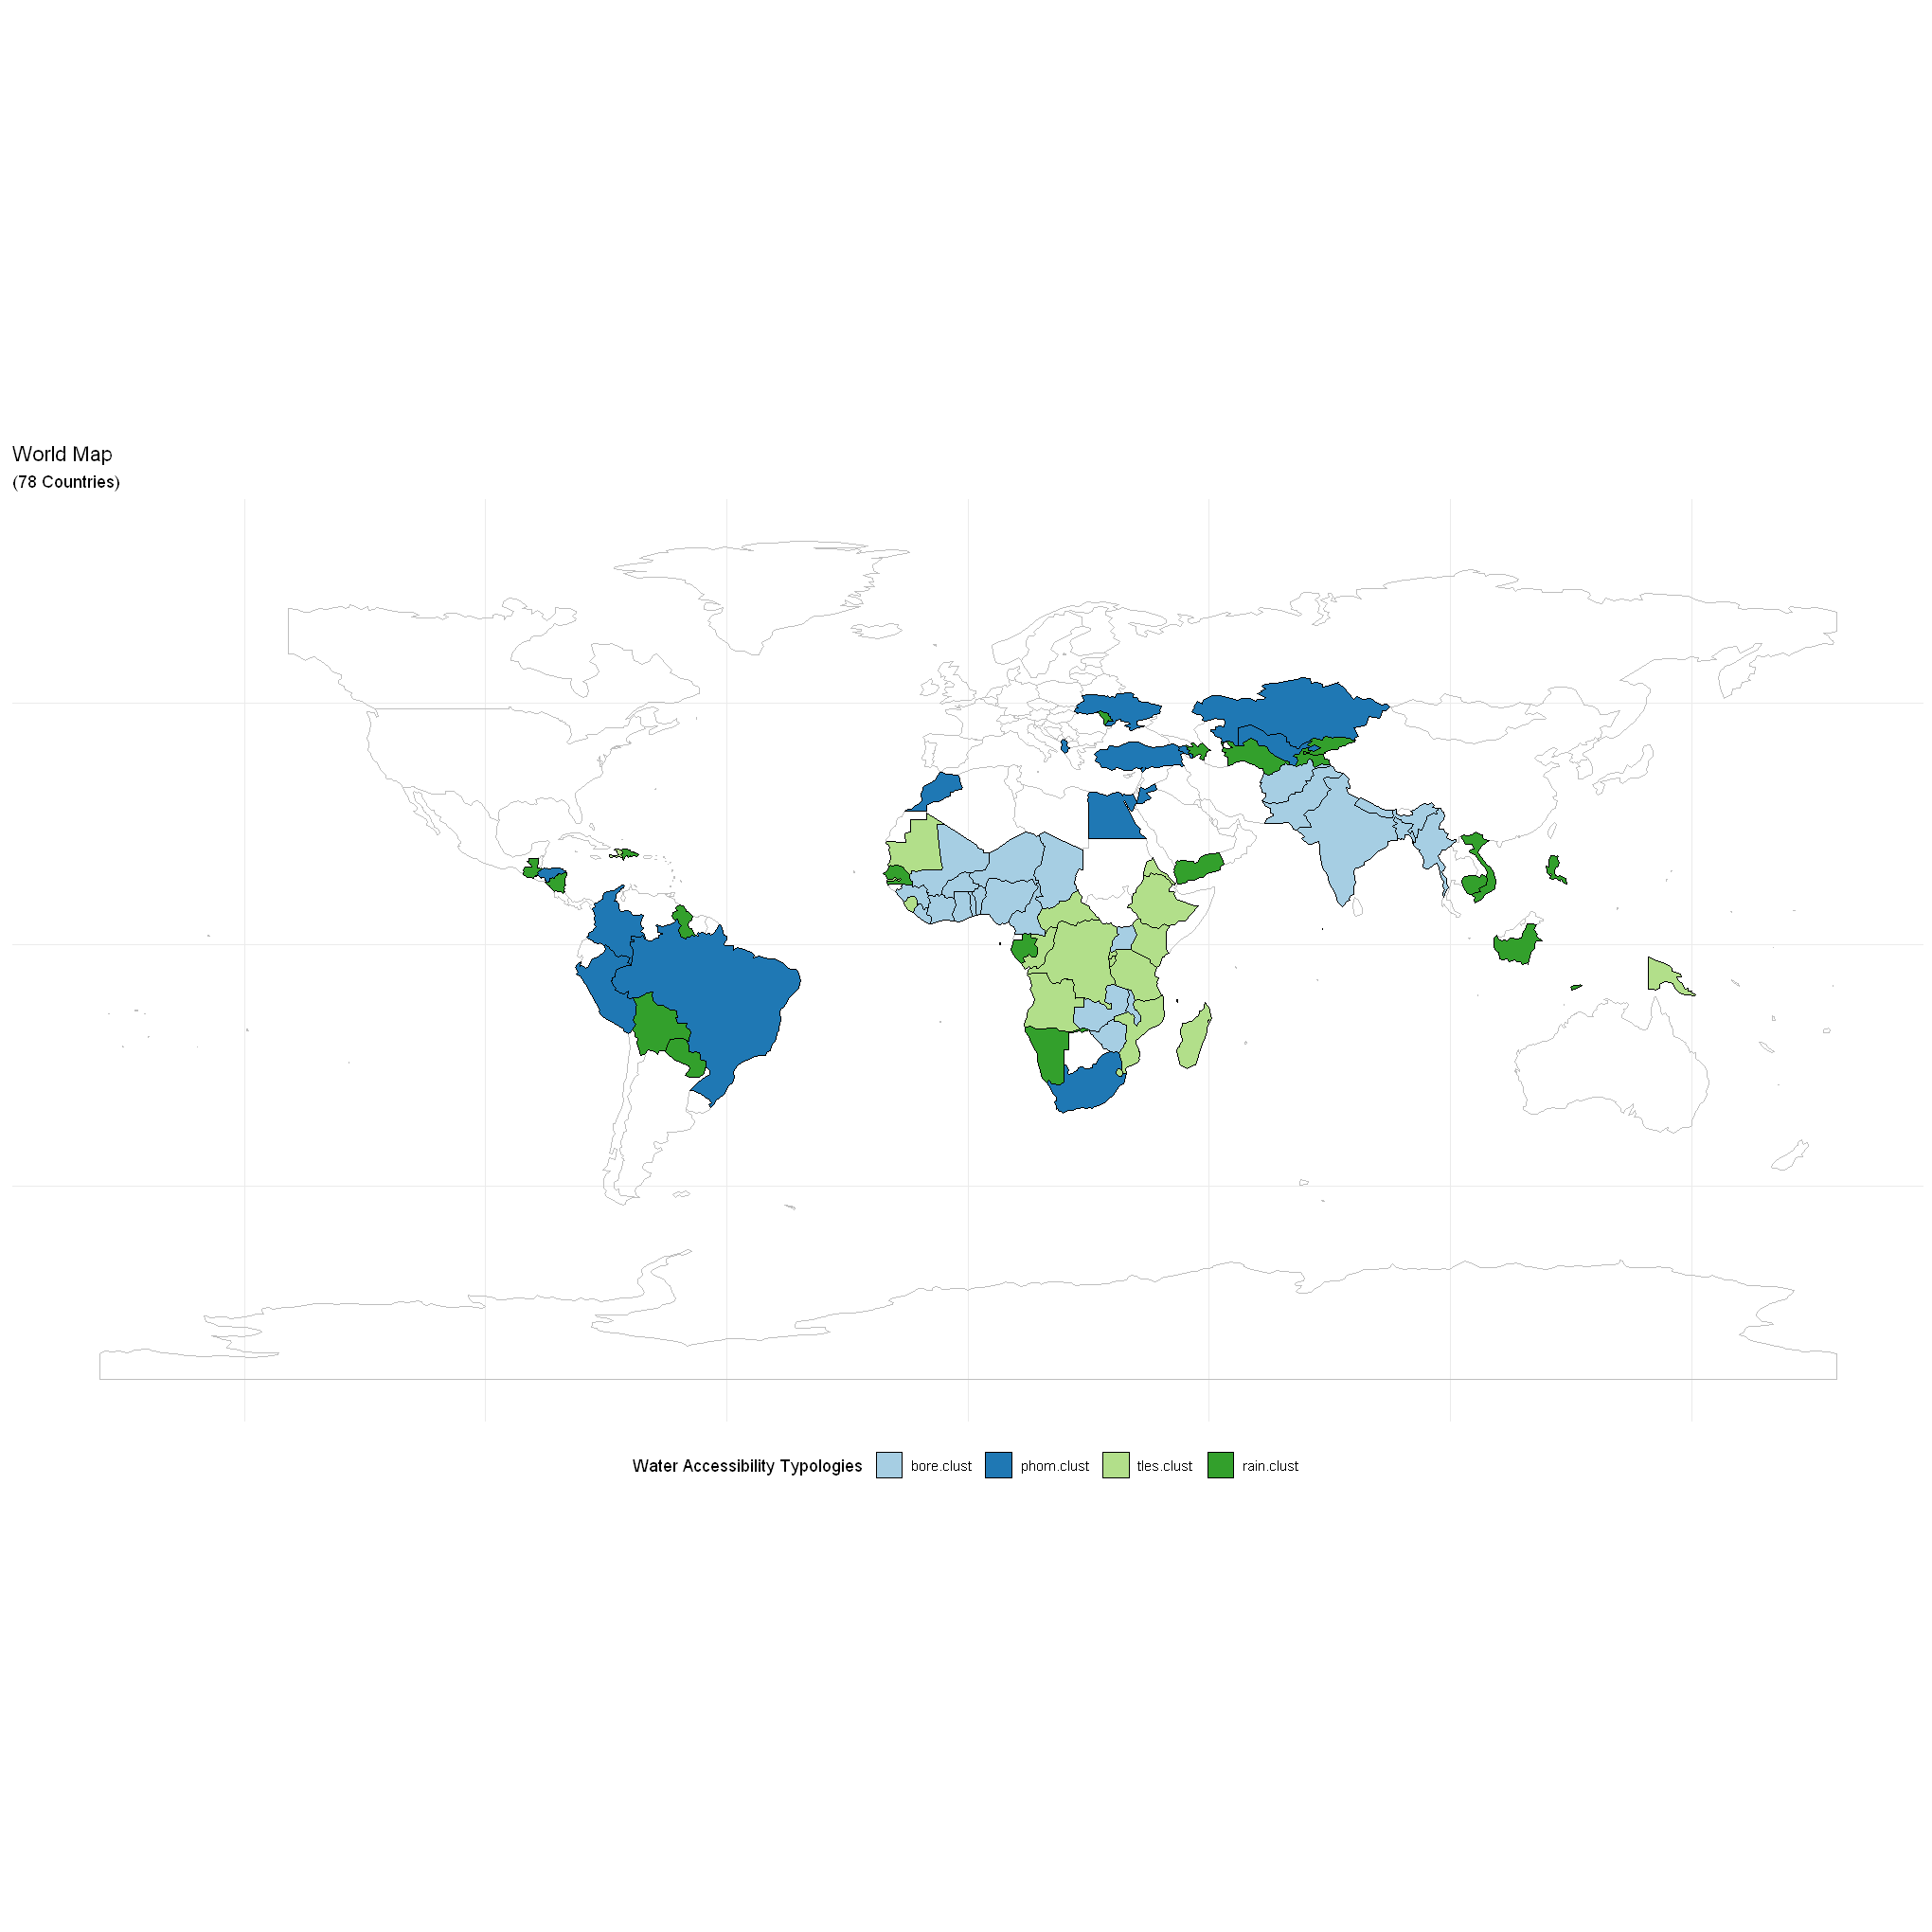

In [121]:
# Plot
options(repr.plot.width=17, repr.plot.height=17)
par(mar = c(1,1,1,1))
par(cex=1)
ggplot() +
    geom_sf(color = "black", fill= 'antiquewhite') +
    xlab("Longitude") + ylab("Latitude") +
    geom_polygon(data= allCoords, mapping = aes(x =long, y=lat,group = region),color="grey",fill=NA) + 
    geom_polygon( data = waterCoords, mapping = aes(x =long, y=lat,group = region, fill=value), size=.3,color="black") +
    expand_limits(x = waterCoords$long, y = waterCoords$lat)  + 
    scale_fill_brewer(palette='Paired', name="Water Accessibility Typologies", na.value="grey", labels = c("bore.clust", "phom.clust", "tles.clust","rain.clust")) +  #labels = c())+
    ggtitle("World Map", subtitle = paste0("(", length(unique(df$region)), " Countries)")) +
    theme_minimal() +
    theme(legend.position = "bottom",
        axis.ticks = element_blank(), 
        axis.title = element_blank(), 
        axis.text =  element_blank()) 
#     #guides(fill = guide_colorbar(barwidth = 10, barheight = .5))


#Ref: https://egallic.fr/en/european-map-using-r/